In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
print(os.getcwd())

/content


# **Homework 1: COVID-19 Cases Prediction (Regression)**

Objectives:
* Solve a regression problem with deep neural networks (DNN).
* Understand basic DNN training tips.
* Familiarize yourself with PyTorch.

If you have any questions, please contact the TAs via TA hours, NTU COOL, or email to mlta-2023-spring@googlegroups.com

# Download data
If the Google Drive links below do not work, you can use the dropbox link below or download data from [Kaggle](https://www.kaggle.com/t/a339b77fa5214978bfb8dde62d3151fe), and upload data manually to the workspace.

In [ ]:
train_path = "covid_train.csv"
test_path = "covid_test.csv"

# dropbox link
!wget -O covid_train.csv https://www.dropbox.com/s/lmy1riadzoy0ahw/covid.train.csv?dl=0
!wget -O covid_test.csv https://www.dropbox.com/s/zalbw42lu4nmhr2/covid.test.csv?dl=0

--2025-06-18 08:33:17--  https://www.dropbox.com/s/lmy1riadzoy0ahw/covid.train.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ewl0ff7lviu0s7f53jp9o/covid.train.csv?rlkey=pocojbo26thh2ncv0xkxfafiv&dl=0 [following]
--2025-06-18 08:33:17--  https://www.dropbox.com/scl/fi/ewl0ff7lviu0s7f53jp9o/covid.train.csv?rlkey=pocojbo26thh2ncv0xkxfafiv&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8a3e4dad4d6fd9ca514be94fa8.dl.dropboxusercontent.com/cd/0/inline/Cr2vhJyHYghS8H04lUrWcbPXuhQnuyiqLBgs6yXg51eG4Csk-foSBSQDsdhhpTrY_C2wpLAtqgJWXjLiklk639H7hfsqmWV2VxjMnpxqDYtg8rX7EhJOjYrnXdKr1F9gkcG0FZiso6_EKo9RuK9Qdz-_/file# [following]
--2025-06-18 08:33:18--  https://uc8a3e4dad4d6fd9ca514be94fa8.dl.dropboxuserc

# Import packages

In [ ]:
# Numerical Operations
import math
import numpy as np

# Data processing
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt

# For Progress Bar
from tqdm import tqdm

# Pytorch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split

# For plotting learning curve
from torch.utils.tensorboard import SummaryWriter

#Data Analysis
Read .csv as pandas dataframe

In [ ]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [ ]:
# data set size (row, column)
print(f'Train data size: {train_data.shape}')
print(f'Test data size: {test_data.shape}')

Train data size: (3009, 89)
Test data size: (997, 88)


In [ ]:
# Data structure examination.
# examining if data elements are missing or buggy.
train_data.info(verbose=True)
test_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3009 non-null   int64  
 1   AL                              3009 non-null   float64
 2   AZ                              3009 non-null   float64
 3   CA                              3009 non-null   float64
 4   CO                              3009 non-null   float64
 5   CT                              3009 non-null   float64
 6   FL                              3009 non-null   float64
 7   GA                              3009 non-null   float64
 8   IL                              3009 non-null   float64
 9   IN                              3009 non-null   float64
 10  IA                              3009 non-null   float64
 11  KS                              3009 non-null   float64
 12  KY                              30

In [ ]:
train_data.iloc[:, 35:].describe().T

,count,mean,std,min,25%,50%,75%,max
cli,3009.0,1.904847,1.164341,0.527492,1.135033,1.497632,2.182141,7.415674
ili,3009.0,1.949034,1.190484,0.532857,1.160726,1.525816,2.212669,7.589683
wnohh_cmnty_cli,3009.0,20.199605,9.733530,6.071146,12.042430,17.684337,25.757733,52.756419
wbelief_masking_effective,3009.0,69.279013,6.572673,53.865832,64.304068,68.929544,73.673015,84.589209
wbelief_distancing_effective,3009.0,70.275338,5.338149,58.124805,66.143604,70.053844,73.630347,84.623704
wcovid_vaccinated_friends,3009.0,64.260715,8.318819,46.016983,57.362452,63.167252,70.899772,83.234836
wlarge_event_indoors,3009.0,24.411230,4.782449,12.220909,21.182495,24.708802,28.092541,36.090664
wothers_masked_public,3009.0,22.043644,17.199215,1.412573,9.640602,14.752181,31.183893,69.108401
wothers_distanced_public,3009.0,18.689943,3.906005,10.160316,15.947625,18.022037,21.149260,30.159699
wshop_indoors,3009.0,65.354739,3.995930,52.795552,62.989557,66.268200,68.387090,73.810029


In [ ]:
test_data.iloc[:, 35:].describe().T

,count,mean,std,min,25%,50%,75%,max
cli,997.0,1.897220,1.145793,0.459629,1.140800,1.480203,2.101550,6.923017
ili,997.0,1.939359,1.172565,0.452934,1.174436,1.508207,2.140535,7.060793
wnohh_cmnty_cli,997.0,20.362337,9.486510,7.392855,13.173949,17.575896,24.124223,49.475345
wbelief_masking_effective,997.0,69.120668,6.501046,51.756826,64.417005,68.384017,74.260086,83.320734
wbelief_distancing_effective,997.0,70.068419,5.227754,53.740496,66.434146,69.675784,74.108132,82.527022
wcovid_vaccinated_friends,997.0,64.121630,8.173042,47.004915,57.585282,62.930748,70.551188,84.543394
wlarge_event_indoors,997.0,24.372528,4.858837,11.229012,21.142374,24.825712,28.135880,36.946235
wothers_masked_public,997.0,22.830055,18.515242,1.673329,9.863171,14.908572,28.243338,68.092995
wothers_distanced_public,997.0,18.692223,4.285753,9.213382,15.720571,17.868679,20.784087,33.712653
wshop_indoors,997.0,65.364926,3.760704,48.496840,63.101046,66.210843,67.989591,73.728770


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

thresholds = [0.05, 0.1, 0.2, 0.3]
target_col = 'tested_positive.2'


best_score = 0
best_features = []
best_threshold = 0

for t in thresholds:
  subset = train_data.iloc[:, 35:]
  correlation = subset.corrwith(train_data['tested_positive.2'])
  features = correlation[correlation.abs() >= t]
  selected_col = features.index.to_list()[:-1]

  if len(selected_col) == 0:
        continue

  X = train_data[selected_col]
  y = train_data[target_col]

  X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

  model = RandomForestRegressor(random_state=42)
  model.fit(X_train, y_train)
  acc = model.score(X_valid, y_valid)

  if acc > best_score:
      best_score = acc
      best_features = selected_col
      best_threshold = t

print(f"best threshold: {best_threshold}")
print(f"accuracy: {best_score:.4f}")
print(f"feature index: {[train_data.columns.get_loc(f) for f in best_features]}")


best threshold: 0.3
accuracy: 0.9904
feature index: [35, 36, 37, 41, 44, 45, 46, 47, 48, 50, 52, 53, 54, 55, 59, 62, 63, 64, 65, 66, 68, 70, 71, 72, 73, 77, 80, 81, 82, 83, 84, 86]


# Hyperparameters

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
config = {
    'seed': 5201314,      # Your seed number, you can pick your lucky number. :)
    'select_all': True,   # Whether to use all features.
    'valid_ratio': 0.2,   # validation_size = train_size * valid_ratio
    'n_epochs': 3000,     # Number of epochs.
    'batch_size': 256,
    'momentum': 0.9,       # SGD momentum.
    'weight_decay': 0.0001,    # Adam weight_decay.
    'optimizer': 'Adam',   # Optimizer.
    'learning_rate': 0.001, # Learning rate.
    'feature idx': [35, 36, 37, 41, 44, 45, 46, 47, 48, 50, 52, 53, 54, 55, 59, 62, 63, 64, 65, 66, 68, 70, 71, 72, 73, 77, 80, 81, 82, 83, 84, 86],
    'early_stop': 100,    # If model has not improved for this many consecutive epochs, stop training.
    'save_path': '/content/drive/MyDrive/models/model.ckpt'  # Your model will be saved here.
}

# Dataset

1. read .csv file
2. process data and extract desired features
3. split sets
4. normalization

In [ ]:
import torch
from torch.utils.data import Dataset
import numpy as np
import csv
from sklearn.model_selection import train_test_split

class COVID19Dataset(Dataset):
    def __init__(self, path, mode, valid_rate, mean=None, std=None):
        self.mode = mode
        self.mean = mean
        self.std = std
        self.feature_idx = [35, 36, 37, 41, 44, 45, 46, 47, 48, 50, 52, 53, 54, 55, 59, 62, 63, 64, 65, 66, 68, 70, 71, 72, 73, 77, 80, 81, 82, 83, 84, 86]
        self.label_idx = 87 # 88 - 1 = 87, we will skip id column afterward, so one col has to be removed.

        # load data and remove title and unuseful info
        with open(path, "r") as f:
            data = list(csv.reader(f))[1:]  # skip title
            data = np.array(data)[:, 1:].astype(float)  # skip id column

        if mode == "test":
            self.x = torch.FloatTensor(data[:, self.feature_idx])
        else:
            train_idx, valid_idx = train_test_split(np.arange(data.shape[0]), test_size=valid_rate, random_state=1)
            if mode == "train":
              self.x = torch.FloatTensor(data[train_idx, :])
              self.y = torch.FloatTensor(data[train_idx, self.label_idx])

            elif mode == "valid":
              self.x = torch.FloatTensor(data[valid_idx, :])
              self.y = torch.FloatTensor(data[valid_idx, self.label_idx])
            self.x = self.x[:, self.feature_idx]
        # Normalization
        if self.mean is not None and self.std is not None:
          self.x = (self.x - self.mean) / self.std

        # record feature amount
        self.features_num = self.x.shape[1]

    def __getitem__(self, index):
        if self.mode == "test":
            return self.x[index]
        else:
            return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x)

# DataLoader

In [ ]:
def prepare_dataloader(path, mode, valid_rate, mean, std, batch_size, jobs_num):
  dataset = COVID19Dataset(path, mode, valid_rate, mean, std)
  dataloader = DataLoader(
      dataset,
      batch_size,
      shuffle=(mode == "train"),
      drop_last=False,
      num_workers=jobs_num,
      pin_memory=True
      )
  return dataloader

# Neural Network Model


In [ ]:
 class My_Model(nn.Module):
    def __init__(self, features_num):
        super(My_Model, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(features_num, 1024),
            nn.ReLU(),
            nn.Linear(1024, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )
        self.criterion = nn.MSELoss(reduction="mean")

    def forward(self, x):
        return self.layers(x).squeeze(1)

    def calculate_loss(self, y, y_hat):
        loss = torch.sqrt(self.criterion(y, y_hat))
        # l1 regularization
        l1_lambda = 0.0001
        l1_reg = 0
        for param in self.parameters():
            l1_reg += torch.sum(torch.abs(param))
        return loss + l1_lambda * l1_reg, loss


# Training Loop

In [ ]:
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter

def train(train_dataloader, valid_dataloader, model, config, device):
    '''Fixes random number generator seeds for reproducibility.'''
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(config['seed'])
    torch.manual_seed(config['seed'])
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(config['seed'])

    # make sure save path exists
    os.makedirs(os.path.dirname(config["save_path"]), exist_ok=True)

    # Visualization in TensorBoard
    writer = SummaryWriter(log_dir='runs/exp1')


    optimizer = getattr(torch.optim, config["optimizer"])(model.parameters(), lr=config['learning_rate'], weight_decay=config['weight_decay']) #, momentum=config['momentum'])
    rsme_min = float('inf')
    early_stop_count = 0
    epoch = 0

    for epoch in range(config['n_epochs']):
        model.train() # Set your model to train mode.
        train_loss = 0

        # tqdm is a package to visualize your training progress.
        train_pbar = tqdm(train_dataloader, position=0, leave=True)
        train_pbar.set_description(f"Epoch [{epoch+1}/{config['n_epochs']}]")
        for x, y in train_pbar:
            x, y = x.to(device), y.to(device)   # Move your data to device. In Pytorch, model and data have to be put in the same device
            optimizer.zero_grad()               # Set gradient to zero.
            y_hat = model(x)                    # equals to model.forward(x), inherit from nn.module
            l1_loss, loss = model.calculate_loss(y, y_hat)
            l1_loss.backward()                     # Compute gradient(backpropagation).
            optimizer.step()                    # Update parameters.
            train_loss += loss.detach().cpu().item() * x.shape[0]
        train_loss /= len(train_dataloader.dataset)

        train_pbar.set_postfix({'batch_loss': loss.detach().cpu().item() * x.shape[0]})

        model.eval() # Set your model to evaluation mode.
        valid_loss = 0
        for x, y in valid_dataloader:
            x, y = x.to(device), y.to(device)   # Move your data to device.
            with torch.no_grad():  # speed up training by not calculating grad.
                y_hat = model(x)
            y_hat = model(x)                    # equals to model.forward(x), inherit from nn.module
            l1_loss, loss = model.calculate_loss(y, y_hat)
            valid_loss += loss.detach().cpu().item() * x.shape[0]
        valid_loss /= len(valid_dataloader.dataset)

        # Visualization in TensorBoard
        writer.add_scalar('Loss/train', train_loss, epoch)
        writer.add_scalar('Loss/valid', valid_loss, epoch)

        print(f"Epoch [{epoch+1}/{config['n_epochs']}]: Train loss: {train_loss:.4f}, Valid loss: {valid_loss:.4f}")
        # writer.add_scalar('Loss/valid', valid_loss, step)

        if valid_loss < rsme_min:
            rsme_min = valid_loss
            torch.save(model.state_dict(), config['save_path']) # Save your best model
            print('Saving model with loss {:.3f}...'.format(rsme_min))
            early_stop_count = 0
        else:
            early_stop_count += 1

        if early_stop_count >= config['early_stop']:
            print('\nModel is not improving, so we halt the training session.')
            writer.close()
            return

        writer.close()

#Load Model

In [ ]:
with open(train_path, "r") as f:
    train_data = list(csv.reader(f))[1:]  # skip title
    train_data = np.array(train_data)[:, 1:].astype(float)  # skip id column
with open(test_path, "r") as f:
    test_data = list(csv.reader(f))[1:]  # skip title
    test_data = np.array(test_data)[:, 1:].astype(float)  # skip id
# all_data = np.vstack((train_data, test_data))

feature_id = config['feature idx']
mean =  torch.FloatTensor(train_data[:, feature_id]).mean(dim=0, keepdim=True)   # only include train_data in calculating mean, std in avoid of data leakage
std = torch.FloatTensor(train_data[:, feature_id]).std(dim=0, keepdim=True)

train_loader = prepare_dataloader(train_path, "train", config['valid_ratio'], mean, std, config['batch_size'], jobs_num=0)
valid_loader = prepare_dataloader(train_path, "valid", config['valid_ratio'], mean, std, config['batch_size'], jobs_num=0)
test_loader = prepare_dataloader(test_path, "test", 0, mean, std, config['batch_size'], jobs_num=0)

In [ ]:
model = My_Model(train_loader.dataset.features_num).to(device)

# Start training!

In [ ]:
train(train_loader, valid_loader, model, config, device)

Epoch [1/3000]: 100%|██████████| 10/10 [00:00<00:00, 36.68it/s]


Epoch [1/3000]: Train loss: 16.8735, Valid loss: 10.9741
Saving model with loss 10.974...


Epoch [2/3000]: 100%|██████████| 10/10 [00:00<00:00, 37.96it/s]


Epoch [2/3000]: Train loss: 9.0397, Valid loss: 8.5279
Saving model with loss 8.528...


Epoch [3/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.58it/s]


Epoch [3/3000]: Train loss: 6.9165, Valid loss: 6.1044
Saving model with loss 6.104...


Epoch [4/3000]: 100%|██████████| 10/10 [00:00<00:00, 43.45it/s]


Epoch [4/3000]: Train loss: 5.8418, Valid loss: 5.5275
Saving model with loss 5.527...


Epoch [5/3000]: 100%|██████████| 10/10 [00:00<00:00, 51.37it/s]


Epoch [5/3000]: Train loss: 5.0313, Valid loss: 4.6289
Saving model with loss 4.629...


Epoch [6/3000]: 100%|██████████| 10/10 [00:00<00:00, 48.54it/s]


Epoch [6/3000]: Train loss: 4.4539, Valid loss: 4.1809
Saving model with loss 4.181...


Epoch [7/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.46it/s]


Epoch [7/3000]: Train loss: 4.0650, Valid loss: 3.8688
Saving model with loss 3.869...


Epoch [8/3000]: 100%|██████████| 10/10 [00:00<00:00, 50.49it/s]


Epoch [8/3000]: Train loss: 3.7192, Valid loss: 3.6096
Saving model with loss 3.610...


Epoch [9/3000]: 100%|██████████| 10/10 [00:00<00:00, 44.04it/s]


Epoch [9/3000]: Train loss: 3.4427, Valid loss: 3.3078
Saving model with loss 3.308...


Epoch [10/3000]: 100%|██████████| 10/10 [00:00<00:00, 45.58it/s]


Epoch [10/3000]: Train loss: 3.1692, Valid loss: 3.0902
Saving model with loss 3.090...


Epoch [11/3000]: 100%|██████████| 10/10 [00:00<00:00, 45.16it/s]


Epoch [11/3000]: Train loss: 2.9602, Valid loss: 2.7982
Saving model with loss 2.798...


Epoch [12/3000]: 100%|██████████| 10/10 [00:00<00:00, 47.21it/s]


Epoch [12/3000]: Train loss: 2.8480, Valid loss: 2.9278


Epoch [13/3000]: 100%|██████████| 10/10 [00:00<00:00, 51.74it/s]


Epoch [13/3000]: Train loss: 2.7947, Valid loss: 2.7235
Saving model with loss 2.723...


Epoch [14/3000]: 100%|██████████| 10/10 [00:00<00:00, 43.49it/s]


Epoch [14/3000]: Train loss: 2.6998, Valid loss: 2.5707
Saving model with loss 2.571...


Epoch [15/3000]: 100%|██████████| 10/10 [00:00<00:00, 44.35it/s]


Epoch [15/3000]: Train loss: 2.5816, Valid loss: 2.5083
Saving model with loss 2.508...


Epoch [16/3000]: 100%|██████████| 10/10 [00:00<00:00, 45.25it/s]


Epoch [16/3000]: Train loss: 2.4869, Valid loss: 2.4777
Saving model with loss 2.478...


Epoch [17/3000]: 100%|██████████| 10/10 [00:00<00:00, 44.48it/s]


Epoch [17/3000]: Train loss: 2.4503, Valid loss: 2.4289
Saving model with loss 2.429...


Epoch [18/3000]: 100%|██████████| 10/10 [00:00<00:00, 42.28it/s]


Epoch [18/3000]: Train loss: 2.4060, Valid loss: 2.3806
Saving model with loss 2.381...


Epoch [19/3000]: 100%|██████████| 10/10 [00:00<00:00, 48.84it/s]


Epoch [19/3000]: Train loss: 2.3520, Valid loss: 2.4056


Epoch [20/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.27it/s]


Epoch [20/3000]: Train loss: 2.3375, Valid loss: 2.4364


Epoch [21/3000]: 100%|██████████| 10/10 [00:00<00:00, 58.37it/s]


Epoch [21/3000]: Train loss: 2.2771, Valid loss: 2.5041


Epoch [22/3000]: 100%|██████████| 10/10 [00:00<00:00, 64.90it/s]


Epoch [22/3000]: Train loss: 2.3195, Valid loss: 2.2814
Saving model with loss 2.281...


Epoch [23/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.73it/s]


Epoch [23/3000]: Train loss: 2.2508, Valid loss: 2.2595
Saving model with loss 2.260...


Epoch [24/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.74it/s]


Epoch [24/3000]: Train loss: 2.2322, Valid loss: 2.2202
Saving model with loss 2.220...


Epoch [25/3000]: 100%|██████████| 10/10 [00:00<00:00, 88.21it/s]


Epoch [25/3000]: Train loss: 2.1764, Valid loss: 2.2071
Saving model with loss 2.207...


Epoch [26/3000]: 100%|██████████| 10/10 [00:00<00:00, 88.34it/s]


Epoch [26/3000]: Train loss: 2.2044, Valid loss: 2.1598
Saving model with loss 2.160...


Epoch [27/3000]: 100%|██████████| 10/10 [00:00<00:00, 88.25it/s]


Epoch [27/3000]: Train loss: 2.1481, Valid loss: 2.1949


Epoch [28/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.83it/s]


Epoch [28/3000]: Train loss: 2.1292, Valid loss: 2.1818


Epoch [29/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.73it/s]


Epoch [29/3000]: Train loss: 2.1212, Valid loss: 2.3520


Epoch [30/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.36it/s]


Epoch [30/3000]: Train loss: 2.1441, Valid loss: 2.2116


Epoch [31/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.47it/s]


Epoch [31/3000]: Train loss: 2.0875, Valid loss: 2.1239
Saving model with loss 2.124...


Epoch [32/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.45it/s]


Epoch [32/3000]: Train loss: 2.0507, Valid loss: 2.1337


Epoch [33/3000]: 100%|██████████| 10/10 [00:00<00:00, 90.87it/s]


Epoch [33/3000]: Train loss: 2.0990, Valid loss: 2.1379


Epoch [34/3000]: 100%|██████████| 10/10 [00:00<00:00, 80.61it/s]


Epoch [34/3000]: Train loss: 2.0782, Valid loss: 2.1355


Epoch [35/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.84it/s]


Epoch [35/3000]: Train loss: 2.0003, Valid loss: 2.0882
Saving model with loss 2.088...


Epoch [36/3000]: 100%|██████████| 10/10 [00:00<00:00, 92.88it/s]


Epoch [36/3000]: Train loss: 2.0011, Valid loss: 2.0316
Saving model with loss 2.032...


Epoch [37/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.99it/s]


Epoch [37/3000]: Train loss: 1.9836, Valid loss: 2.0036
Saving model with loss 2.004...


Epoch [38/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.97it/s]


Epoch [38/3000]: Train loss: 1.9876, Valid loss: 2.1114


Epoch [39/3000]: 100%|██████████| 10/10 [00:00<00:00, 89.85it/s]


Epoch [39/3000]: Train loss: 1.9362, Valid loss: 1.9899
Saving model with loss 1.990...


Epoch [40/3000]: 100%|██████████| 10/10 [00:00<00:00, 87.27it/s]


Epoch [40/3000]: Train loss: 1.9175, Valid loss: 2.0506


Epoch [41/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.95it/s]


Epoch [41/3000]: Train loss: 1.9843, Valid loss: 2.0656


Epoch [42/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.92it/s]


Epoch [42/3000]: Train loss: 1.9185, Valid loss: 1.9674
Saving model with loss 1.967...


Epoch [43/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.54it/s]


Epoch [43/3000]: Train loss: 1.8980, Valid loss: 1.9460
Saving model with loss 1.946...


Epoch [44/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.11it/s]


Epoch [44/3000]: Train loss: 1.8647, Valid loss: 2.1535


Epoch [45/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.16it/s]


Epoch [45/3000]: Train loss: 1.8969, Valid loss: 1.9483


Epoch [46/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.66it/s]


Epoch [46/3000]: Train loss: 1.8702, Valid loss: 1.9276
Saving model with loss 1.928...


Epoch [47/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.31it/s]


Epoch [47/3000]: Train loss: 1.8745, Valid loss: 1.9699


Epoch [48/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.33it/s]


Epoch [48/3000]: Train loss: 1.8679, Valid loss: 2.0242


Epoch [49/3000]: 100%|██████████| 10/10 [00:00<00:00, 89.72it/s]


Epoch [49/3000]: Train loss: 1.8254, Valid loss: 1.9350


Epoch [50/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.80it/s]


Epoch [50/3000]: Train loss: 1.8232, Valid loss: 1.8810
Saving model with loss 1.881...


Epoch [51/3000]: 100%|██████████| 10/10 [00:00<00:00, 93.52it/s]


Epoch [51/3000]: Train loss: 1.8187, Valid loss: 1.8787
Saving model with loss 1.879...


Epoch [52/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.19it/s]


Epoch [52/3000]: Train loss: 1.8260, Valid loss: 1.9392


Epoch [53/3000]: 100%|██████████| 10/10 [00:00<00:00, 89.74it/s]


Epoch [53/3000]: Train loss: 1.8828, Valid loss: 2.0637


Epoch [54/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.64it/s]


Epoch [54/3000]: Train loss: 1.8186, Valid loss: 1.8935


Epoch [55/3000]: 100%|██████████| 10/10 [00:00<00:00, 92.65it/s]


Epoch [55/3000]: Train loss: 1.7717, Valid loss: 2.0658


Epoch [56/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.52it/s]


Epoch [56/3000]: Train loss: 1.8296, Valid loss: 1.8560
Saving model with loss 1.856...


Epoch [57/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.00it/s]


Epoch [57/3000]: Train loss: 1.8113, Valid loss: 1.9326


Epoch [58/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.61it/s]


Epoch [58/3000]: Train loss: 1.8597, Valid loss: 1.8483
Saving model with loss 1.848...


Epoch [59/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.86it/s]


Epoch [59/3000]: Train loss: 1.7794, Valid loss: 1.9113


Epoch [60/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.28it/s]


Epoch [60/3000]: Train loss: 1.7255, Valid loss: 1.8246
Saving model with loss 1.825...


Epoch [61/3000]: 100%|██████████| 10/10 [00:00<00:00, 90.94it/s]


Epoch [61/3000]: Train loss: 1.7465, Valid loss: 1.9283


Epoch [62/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.43it/s]


Epoch [62/3000]: Train loss: 1.7611, Valid loss: 1.8226
Saving model with loss 1.823...


Epoch [63/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.69it/s]


Epoch [63/3000]: Train loss: 1.7493, Valid loss: 1.7893
Saving model with loss 1.789...


Epoch [64/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.87it/s]


Epoch [64/3000]: Train loss: 1.7237, Valid loss: 1.9423


Epoch [65/3000]: 100%|██████████| 10/10 [00:00<00:00, 90.41it/s]


Epoch [65/3000]: Train loss: 1.7468, Valid loss: 1.8029


Epoch [66/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.43it/s]


Epoch [66/3000]: Train loss: 1.7485, Valid loss: 1.7945


Epoch [67/3000]: 100%|██████████| 10/10 [00:00<00:00, 88.40it/s]


Epoch [67/3000]: Train loss: 1.7477, Valid loss: 1.7939


Epoch [68/3000]: 100%|██████████| 10/10 [00:00<00:00, 87.13it/s]


Epoch [68/3000]: Train loss: 1.7570, Valid loss: 1.8601


Epoch [69/3000]: 100%|██████████| 10/10 [00:00<00:00, 88.29it/s]


Epoch [69/3000]: Train loss: 1.6774, Valid loss: 1.7731
Saving model with loss 1.773...


Epoch [70/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.80it/s]


Epoch [70/3000]: Train loss: 1.6793, Valid loss: 1.7880


Epoch [71/3000]: 100%|██████████| 10/10 [00:00<00:00, 89.40it/s]


Epoch [71/3000]: Train loss: 1.6666, Valid loss: 1.7871


Epoch [72/3000]: 100%|██████████| 10/10 [00:00<00:00, 89.28it/s]


Epoch [72/3000]: Train loss: 1.6825, Valid loss: 1.7809


Epoch [73/3000]: 100%|██████████| 10/10 [00:00<00:00, 24.58it/s]


Epoch [73/3000]: Train loss: 1.6290, Valid loss: 1.8267


Epoch [74/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.57it/s]


Epoch [74/3000]: Train loss: 1.6407, Valid loss: 1.9060


Epoch [75/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.77it/s]


Epoch [75/3000]: Train loss: 1.6676, Valid loss: 1.7743


Epoch [76/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.87it/s]


Epoch [76/3000]: Train loss: 1.6602, Valid loss: 1.7690
Saving model with loss 1.769...


Epoch [77/3000]: 100%|██████████| 10/10 [00:00<00:00, 24.02it/s]


Epoch [77/3000]: Train loss: 1.6389, Valid loss: 1.7475
Saving model with loss 1.748...


Epoch [78/3000]: 100%|██████████| 10/10 [00:00<00:00, 88.00it/s]


Epoch [78/3000]: Train loss: 1.6126, Valid loss: 1.8178


Epoch [79/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.07it/s]


Epoch [79/3000]: Train loss: 1.6140, Valid loss: 1.8302


Epoch [80/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.62it/s]


Epoch [80/3000]: Train loss: 1.6449, Valid loss: 1.6986
Saving model with loss 1.699...


Epoch [81/3000]: 100%|██████████| 10/10 [00:00<00:00, 14.36it/s]


Epoch [81/3000]: Train loss: 1.5890, Valid loss: 1.8282


Epoch [82/3000]: 100%|██████████| 10/10 [00:00<00:00, 59.27it/s]


Epoch [82/3000]: Train loss: 1.5656, Valid loss: 1.7149


Epoch [83/3000]: 100%|██████████| 10/10 [00:00<00:00, 60.34it/s]


Epoch [83/3000]: Train loss: 1.5539, Valid loss: 1.7957


Epoch [84/3000]: 100%|██████████| 10/10 [00:00<00:00, 62.68it/s]


Epoch [84/3000]: Train loss: 1.6164, Valid loss: 1.7623


Epoch [85/3000]: 100%|██████████| 10/10 [00:00<00:00, 64.40it/s]


Epoch [85/3000]: Train loss: 1.5800, Valid loss: 1.6960
Saving model with loss 1.696...


Epoch [86/3000]: 100%|██████████| 10/10 [00:00<00:00, 63.29it/s]

Epoch [86/3000]: Train loss: 1.5677, Valid loss: 1.6593


Saving model with loss 1.659...


Epoch [87/3000]: 100%|██████████| 10/10 [00:00<00:00, 63.43it/s]


Epoch [87/3000]: Train loss: 1.5478, Valid loss: 1.6916


Epoch [88/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.64it/s]


Epoch [88/3000]: Train loss: 1.6023, Valid loss: 1.8152


Epoch [89/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.43it/s]


Epoch [89/3000]: Train loss: 1.5850, Valid loss: 1.7082


Epoch [90/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.71it/s]


Epoch [90/3000]: Train loss: 1.5780, Valid loss: 1.6470
Saving model with loss 1.647...


Epoch [91/3000]: 100%|██████████| 10/10 [00:00<00:00, 64.25it/s]


Epoch [91/3000]: Train loss: 1.5532, Valid loss: 1.6571


Epoch [92/3000]: 100%|██████████| 10/10 [00:00<00:00, 66.60it/s]


Epoch [92/3000]: Train loss: 1.5619, Valid loss: 1.6654


Epoch [93/3000]: 100%|██████████| 10/10 [00:00<00:00, 58.74it/s]


Epoch [93/3000]: Train loss: 1.5493, Valid loss: 1.8257


Epoch [94/3000]: 100%|██████████| 10/10 [00:00<00:00, 59.15it/s]


Epoch [94/3000]: Train loss: 1.6925, Valid loss: 1.9652


Epoch [95/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.87it/s]


Epoch [95/3000]: Train loss: 1.5810, Valid loss: 1.6904


Epoch [96/3000]: 100%|██████████| 10/10 [00:00<00:00, 63.14it/s]


Epoch [96/3000]: Train loss: 1.5542, Valid loss: 1.7813


Epoch [97/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.46it/s]


Epoch [97/3000]: Train loss: 1.5307, Valid loss: 1.6605


Epoch [98/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.66it/s]


Epoch [98/3000]: Train loss: 1.5203, Valid loss: 1.6651


Epoch [99/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.45it/s]


Epoch [99/3000]: Train loss: 1.5526, Valid loss: 1.7024


Epoch [100/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.60it/s]


Epoch [100/3000]: Train loss: 1.5393, Valid loss: 1.6047
Saving model with loss 1.605...


Epoch [101/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.82it/s]


Epoch [101/3000]: Train loss: 1.4482, Valid loss: 1.6259


Epoch [102/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.14it/s]


Epoch [102/3000]: Train loss: 1.4410, Valid loss: 1.6009
Saving model with loss 1.601...


Epoch [103/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.91it/s]


Epoch [103/3000]: Train loss: 1.4686, Valid loss: 1.7594


Epoch [104/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.20it/s]


Epoch [104/3000]: Train loss: 1.5196, Valid loss: 1.6863


Epoch [105/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.34it/s]


Epoch [105/3000]: Train loss: 1.5189, Valid loss: 1.6743


Epoch [106/3000]: 100%|██████████| 10/10 [00:00<00:00, 88.80it/s]


Epoch [106/3000]: Train loss: 1.4691, Valid loss: 1.6635


Epoch [107/3000]: 100%|██████████| 10/10 [00:00<00:00, 89.68it/s]


Epoch [107/3000]: Train loss: 1.4600, Valid loss: 1.6496


Epoch [108/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.91it/s]


Epoch [108/3000]: Train loss: 1.4833, Valid loss: 1.6540


Epoch [109/3000]: 100%|██████████| 10/10 [00:00<00:00, 88.12it/s]


Epoch [109/3000]: Train loss: 1.4737, Valid loss: 1.5794
Saving model with loss 1.579...


Epoch [110/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.83it/s]


Epoch [110/3000]: Train loss: 1.4374, Valid loss: 1.6651


Epoch [111/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.68it/s]


Epoch [111/3000]: Train loss: 1.4758, Valid loss: 1.7008


Epoch [112/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.74it/s]


Epoch [112/3000]: Train loss: 1.4811, Valid loss: 1.6409


Epoch [113/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.40it/s]


Epoch [113/3000]: Train loss: 1.4993, Valid loss: 1.6335


Epoch [114/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.46it/s]


Epoch [114/3000]: Train loss: 1.4507, Valid loss: 1.5656
Saving model with loss 1.566...


Epoch [115/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.10it/s]


Epoch [115/3000]: Train loss: 1.5066, Valid loss: 1.8024


Epoch [116/3000]: 100%|██████████| 10/10 [00:00<00:00, 87.90it/s]


Epoch [116/3000]: Train loss: 1.4964, Valid loss: 1.6311


Epoch [117/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.41it/s]


Epoch [117/3000]: Train loss: 1.4491, Valid loss: 1.6920


Epoch [118/3000]: 100%|██████████| 10/10 [00:00<00:00, 89.03it/s]


Epoch [118/3000]: Train loss: 1.4978, Valid loss: 1.6742


Epoch [119/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.27it/s]


Epoch [119/3000]: Train loss: 1.4441, Valid loss: 1.6722


Epoch [120/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.11it/s]


Epoch [120/3000]: Train loss: 1.4907, Valid loss: 1.5652
Saving model with loss 1.565...


Epoch [121/3000]: 100%|██████████| 10/10 [00:00<00:00, 89.32it/s]


Epoch [121/3000]: Train loss: 1.3843, Valid loss: 1.5503
Saving model with loss 1.550...


Epoch [122/3000]: 100%|██████████| 10/10 [00:00<00:00, 87.81it/s]


Epoch [122/3000]: Train loss: 1.3573, Valid loss: 1.5681


Epoch [123/3000]: 100%|██████████| 10/10 [00:00<00:00, 87.25it/s]


Epoch [123/3000]: Train loss: 1.3939, Valid loss: 1.5603


Epoch [124/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.55it/s]


Epoch [124/3000]: Train loss: 1.3755, Valid loss: 1.5632


Epoch [125/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.64it/s]


Epoch [125/3000]: Train loss: 1.3916, Valid loss: 1.5382
Saving model with loss 1.538...


Epoch [126/3000]: 100%|██████████| 10/10 [00:00<00:00, 87.83it/s]


Epoch [126/3000]: Train loss: 1.3448, Valid loss: 1.5497


Epoch [127/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.24it/s]


Epoch [127/3000]: Train loss: 1.3391, Valid loss: 1.5526


Epoch [128/3000]: 100%|██████████| 10/10 [00:00<00:00, 90.25it/s]


Epoch [128/3000]: Train loss: 1.3495, Valid loss: 1.5460


Epoch [129/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.08it/s]


Epoch [129/3000]: Train loss: 1.3293, Valid loss: 1.5131
Saving model with loss 1.513...


Epoch [130/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.13it/s]


Epoch [130/3000]: Train loss: 1.3181, Valid loss: 1.5414


Epoch [131/3000]: 100%|██████████| 10/10 [00:00<00:00, 87.93it/s]


Epoch [131/3000]: Train loss: 1.3410, Valid loss: 1.5196


Epoch [132/3000]: 100%|██████████| 10/10 [00:00<00:00, 87.83it/s]


Epoch [132/3000]: Train loss: 1.3369, Valid loss: 1.5468


Epoch [133/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.92it/s]


Epoch [133/3000]: Train loss: 1.3382, Valid loss: 1.6878


Epoch [134/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.52it/s]


Epoch [134/3000]: Train loss: 1.4182, Valid loss: 1.6822


Epoch [135/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.64it/s]


Epoch [135/3000]: Train loss: 1.3906, Valid loss: 1.5476


Epoch [136/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.60it/s]


Epoch [136/3000]: Train loss: 1.3467, Valid loss: 1.5483


Epoch [137/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.70it/s]


Epoch [137/3000]: Train loss: 1.3377, Valid loss: 1.6289


Epoch [138/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.62it/s]


Epoch [138/3000]: Train loss: 1.3832, Valid loss: 1.5042
Saving model with loss 1.504...


Epoch [139/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.61it/s]


Epoch [139/3000]: Train loss: 1.2905, Valid loss: 1.5771


Epoch [140/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.97it/s]


Epoch [140/3000]: Train loss: 1.3450, Valid loss: 1.5130


Epoch [141/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.03it/s]


Epoch [141/3000]: Train loss: 1.2905, Valid loss: 1.5224


Epoch [142/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.82it/s]


Epoch [142/3000]: Train loss: 1.2990, Valid loss: 1.6042


Epoch [143/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.12it/s]


Epoch [143/3000]: Train loss: 1.3869, Valid loss: 1.7576


Epoch [144/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.58it/s]


Epoch [144/3000]: Train loss: 1.4085, Valid loss: 1.5236


Epoch [145/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.80it/s]


Epoch [145/3000]: Train loss: 1.2882, Valid loss: 1.4992
Saving model with loss 1.499...


Epoch [146/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.22it/s]


Epoch [146/3000]: Train loss: 1.3063, Valid loss: 1.5464


Epoch [147/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.98it/s]


Epoch [147/3000]: Train loss: 1.3282, Valid loss: 1.5271


Epoch [148/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.54it/s]


Epoch [148/3000]: Train loss: 1.2821, Valid loss: 1.4695
Saving model with loss 1.469...


Epoch [149/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.64it/s]


Epoch [149/3000]: Train loss: 1.3301, Valid loss: 1.4697


Epoch [150/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.82it/s]


Epoch [150/3000]: Train loss: 1.3033, Valid loss: 1.5118


Epoch [151/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.54it/s]


Epoch [151/3000]: Train loss: 1.2442, Valid loss: 1.4683
Saving model with loss 1.468...


Epoch [152/3000]: 100%|██████████| 10/10 [00:00<00:00, 88.18it/s]


Epoch [152/3000]: Train loss: 1.2530, Valid loss: 1.5957


Epoch [153/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.54it/s]


Epoch [153/3000]: Train loss: 1.3110, Valid loss: 1.5426


Epoch [154/3000]: 100%|██████████| 10/10 [00:00<00:00, 88.16it/s]


Epoch [154/3000]: Train loss: 1.2766, Valid loss: 1.4928


Epoch [155/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.50it/s]


Epoch [155/3000]: Train loss: 1.2439, Valid loss: 1.5617


Epoch [156/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.12it/s]


Epoch [156/3000]: Train loss: 1.2572, Valid loss: 1.5336


Epoch [157/3000]: 100%|██████████| 10/10 [00:00<00:00, 89.41it/s]


Epoch [157/3000]: Train loss: 1.3020, Valid loss: 1.5299


Epoch [158/3000]: 100%|██████████| 10/10 [00:00<00:00, 87.51it/s]


Epoch [158/3000]: Train loss: 1.2855, Valid loss: 1.5434


Epoch [159/3000]: 100%|██████████| 10/10 [00:00<00:00, 92.87it/s]


Epoch [159/3000]: Train loss: 1.2235, Valid loss: 1.4611
Saving model with loss 1.461...


Epoch [160/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.42it/s]


Epoch [160/3000]: Train loss: 1.2060, Valid loss: 1.4449
Saving model with loss 1.445...


Epoch [161/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.99it/s]


Epoch [161/3000]: Train loss: 1.2113, Valid loss: 1.4688


Epoch [162/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.06it/s]


Epoch [162/3000]: Train loss: 1.2559, Valid loss: 1.5609


Epoch [163/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.56it/s]


Epoch [163/3000]: Train loss: 1.2810, Valid loss: 1.4734


Epoch [164/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.45it/s]


Epoch [164/3000]: Train loss: 1.2186, Valid loss: 1.4488


Epoch [165/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.58it/s]


Epoch [165/3000]: Train loss: 1.1995, Valid loss: 1.4936


Epoch [166/3000]: 100%|██████████| 10/10 [00:00<00:00, 62.46it/s]


Epoch [166/3000]: Train loss: 1.1924, Valid loss: 1.4563


Epoch [167/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.15it/s]


Epoch [167/3000]: Train loss: 1.2151, Valid loss: 1.4866


Epoch [168/3000]: 100%|██████████| 10/10 [00:00<00:00, 51.57it/s]


Epoch [168/3000]: Train loss: 1.2245, Valid loss: 1.5222


Epoch [169/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.63it/s]


Epoch [169/3000]: Train loss: 1.1879, Valid loss: 1.4769


Epoch [170/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.54it/s]


Epoch [170/3000]: Train loss: 1.1925, Valid loss: 1.4798


Epoch [171/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.13it/s]


Epoch [171/3000]: Train loss: 1.2087, Valid loss: 1.5889


Epoch [172/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.03it/s]


Epoch [172/3000]: Train loss: 1.2046, Valid loss: 1.4458


Epoch [173/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.01it/s]


Epoch [173/3000]: Train loss: 1.1729, Valid loss: 1.4783


Epoch [174/3000]: 100%|██████████| 10/10 [00:00<00:00, 60.22it/s]


Epoch [174/3000]: Train loss: 1.1885, Valid loss: 1.4611


Epoch [175/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.38it/s]


Epoch [175/3000]: Train loss: 1.1685, Valid loss: 1.4231
Saving model with loss 1.423...


Epoch [176/3000]: 100%|██████████| 10/10 [00:00<00:00, 59.94it/s]


Epoch [176/3000]: Train loss: 1.1955, Valid loss: 1.5064


Epoch [177/3000]: 100%|██████████| 10/10 [00:00<00:00, 58.76it/s]

Epoch [177/3000]: Train loss: 1.1960, Valid loss: 1.4026


Saving model with loss 1.403...


Epoch [178/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.52it/s]


Epoch [178/3000]: Train loss: 1.2142, Valid loss: 1.6302


Epoch [179/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.33it/s]


Epoch [179/3000]: Train loss: 1.2892, Valid loss: 1.6370


Epoch [180/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.94it/s]


Epoch [180/3000]: Train loss: 1.2515, Valid loss: 1.7345


Epoch [181/3000]: 100%|██████████| 10/10 [00:00<00:00, 58.92it/s]


Epoch [181/3000]: Train loss: 1.2898, Valid loss: 1.5855


Epoch [182/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.00it/s]


Epoch [182/3000]: Train loss: 1.2231, Valid loss: 1.4601


Epoch [183/3000]: 100%|██████████| 10/10 [00:00<00:00, 60.06it/s]


Epoch [183/3000]: Train loss: 1.1778, Valid loss: 1.4826


Epoch [184/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.75it/s]


Epoch [184/3000]: Train loss: 1.1647, Valid loss: 1.4396


Epoch [185/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.41it/s]


Epoch [185/3000]: Train loss: 1.1691, Valid loss: 1.6277


Epoch [186/3000]: 100%|██████████| 10/10 [00:00<00:00, 56.69it/s]


Epoch [186/3000]: Train loss: 1.2567, Valid loss: 1.4979


Epoch [187/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.29it/s]


Epoch [187/3000]: Train loss: 1.1623, Valid loss: 1.5328


Epoch [188/3000]: 100%|██████████| 10/10 [00:00<00:00, 87.72it/s]


Epoch [188/3000]: Train loss: 1.1487, Valid loss: 1.4193


Epoch [189/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.74it/s]


Epoch [189/3000]: Train loss: 1.1260, Valid loss: 1.4409


Epoch [190/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.90it/s]


Epoch [190/3000]: Train loss: 1.1871, Valid loss: 1.4070


Epoch [191/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.79it/s]


Epoch [191/3000]: Train loss: 1.1755, Valid loss: 1.6032


Epoch [192/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.28it/s]


Epoch [192/3000]: Train loss: 1.2198, Valid loss: 1.5764


Epoch [193/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.31it/s]


Epoch [193/3000]: Train loss: 1.2380, Valid loss: 1.4060


Epoch [194/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.00it/s]


Epoch [194/3000]: Train loss: 1.1354, Valid loss: 1.4234


Epoch [195/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.03it/s]


Epoch [195/3000]: Train loss: 1.1216, Valid loss: 1.4020
Saving model with loss 1.402...


Epoch [196/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.13it/s]


Epoch [196/3000]: Train loss: 1.2166, Valid loss: 1.4815


Epoch [197/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.62it/s]


Epoch [197/3000]: Train loss: 1.1657, Valid loss: 1.5129


Epoch [198/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.11it/s]


Epoch [198/3000]: Train loss: 1.1902, Valid loss: 1.5003


Epoch [199/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.23it/s]


Epoch [199/3000]: Train loss: 1.1345, Valid loss: 1.3905
Saving model with loss 1.390...


Epoch [200/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.88it/s]


Epoch [200/3000]: Train loss: 1.1456, Valid loss: 1.3713
Saving model with loss 1.371...


Epoch [201/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.17it/s]


Epoch [201/3000]: Train loss: 1.1104, Valid loss: 1.4167


Epoch [202/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.70it/s]


Epoch [202/3000]: Train loss: 1.1837, Valid loss: 1.3777


Epoch [203/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.22it/s]


Epoch [203/3000]: Train loss: 1.1455, Valid loss: 1.3698
Saving model with loss 1.370...


Epoch [204/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.65it/s]


Epoch [204/3000]: Train loss: 1.0902, Valid loss: 1.4076


Epoch [205/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.15it/s]


Epoch [205/3000]: Train loss: 1.0955, Valid loss: 1.3718


Epoch [206/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.78it/s]


Epoch [206/3000]: Train loss: 1.1002, Valid loss: 1.3867


Epoch [207/3000]: 100%|██████████| 10/10 [00:00<00:00, 80.41it/s]


Epoch [207/3000]: Train loss: 1.0992, Valid loss: 1.3986


Epoch [208/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.13it/s]


Epoch [208/3000]: Train loss: 1.2281, Valid loss: 1.4636


Epoch [209/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.49it/s]


Epoch [209/3000]: Train loss: 1.2212, Valid loss: 1.5765


Epoch [210/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.48it/s]


Epoch [210/3000]: Train loss: 1.2140, Valid loss: 1.5623


Epoch [211/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.58it/s]


Epoch [211/3000]: Train loss: 1.2255, Valid loss: 1.4041


Epoch [212/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.75it/s]


Epoch [212/3000]: Train loss: 1.1374, Valid loss: 1.4456


Epoch [213/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.25it/s]


Epoch [213/3000]: Train loss: 1.1617, Valid loss: 1.6101


Epoch [214/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.42it/s]


Epoch [214/3000]: Train loss: 1.1897, Valid loss: 1.4583


Epoch [215/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.19it/s]


Epoch [215/3000]: Train loss: 1.1538, Valid loss: 1.6218


Epoch [216/3000]: 100%|██████████| 10/10 [00:00<00:00, 80.03it/s]


Epoch [216/3000]: Train loss: 1.1531, Valid loss: 1.3552
Saving model with loss 1.355...


Epoch [217/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.17it/s]


Epoch [217/3000]: Train loss: 1.1049, Valid loss: 1.3467
Saving model with loss 1.347...


Epoch [218/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.07it/s]


Epoch [218/3000]: Train loss: 1.0721, Valid loss: 1.3480


Epoch [219/3000]: 100%|██████████| 10/10 [00:00<00:00, 87.94it/s]


Epoch [219/3000]: Train loss: 1.1075, Valid loss: 1.3716


Epoch [220/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.22it/s]


Epoch [220/3000]: Train loss: 1.0824, Valid loss: 1.4144


Epoch [221/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.40it/s]


Epoch [221/3000]: Train loss: 1.1144, Valid loss: 1.4317


Epoch [222/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.68it/s]


Epoch [222/3000]: Train loss: 1.0897, Valid loss: 1.3889


Epoch [223/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.61it/s]


Epoch [223/3000]: Train loss: 1.0823, Valid loss: 1.4059


Epoch [224/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.82it/s]


Epoch [224/3000]: Train loss: 1.0717, Valid loss: 1.3847


Epoch [225/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.91it/s]


Epoch [225/3000]: Train loss: 1.0653, Valid loss: 1.3809


Epoch [226/3000]: 100%|██████████| 10/10 [00:00<00:00, 80.56it/s]


Epoch [226/3000]: Train loss: 1.0862, Valid loss: 1.3853


Epoch [227/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.76it/s]


Epoch [227/3000]: Train loss: 1.0673, Valid loss: 1.3303
Saving model with loss 1.330...


Epoch [228/3000]: 100%|██████████| 10/10 [00:00<00:00, 80.06it/s]


Epoch [228/3000]: Train loss: 1.0604, Valid loss: 1.3962


Epoch [229/3000]: 100%|██████████| 10/10 [00:00<00:00, 87.11it/s]


Epoch [229/3000]: Train loss: 1.0558, Valid loss: 1.3489


Epoch [230/3000]: 100%|██████████| 10/10 [00:00<00:00, 80.66it/s]


Epoch [230/3000]: Train loss: 1.0722, Valid loss: 1.4389


Epoch [231/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.19it/s]


Epoch [231/3000]: Train loss: 1.0747, Valid loss: 1.3860


Epoch [232/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.50it/s]


Epoch [232/3000]: Train loss: 1.1372, Valid loss: 1.3473


Epoch [233/3000]: 100%|██████████| 10/10 [00:00<00:00, 88.20it/s]


Epoch [233/3000]: Train loss: 1.0669, Valid loss: 1.4339


Epoch [234/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.53it/s]


Epoch [234/3000]: Train loss: 1.0725, Valid loss: 1.3962


Epoch [235/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.04it/s]


Epoch [235/3000]: Train loss: 1.0755, Valid loss: 1.4863


Epoch [236/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.99it/s]


Epoch [236/3000]: Train loss: 1.1170, Valid loss: 1.3904


Epoch [237/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.20it/s]


Epoch [237/3000]: Train loss: 1.0599, Valid loss: 1.4357


Epoch [238/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.12it/s]


Epoch [238/3000]: Train loss: 1.0723, Valid loss: 1.3297
Saving model with loss 1.330...


Epoch [239/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.06it/s]


Epoch [239/3000]: Train loss: 1.0085, Valid loss: 1.3373


Epoch [240/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.33it/s]


Epoch [240/3000]: Train loss: 1.0166, Valid loss: 1.3808


Epoch [241/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.39it/s]


Epoch [241/3000]: Train loss: 1.0346, Valid loss: 1.3516


Epoch [242/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.02it/s]


Epoch [242/3000]: Train loss: 1.0249, Valid loss: 1.4106


Epoch [243/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.97it/s]


Epoch [243/3000]: Train loss: 1.0517, Valid loss: 1.3660


Epoch [244/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.29it/s]


Epoch [244/3000]: Train loss: 1.0419, Valid loss: 1.4175


Epoch [245/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.18it/s]


Epoch [245/3000]: Train loss: 1.0644, Valid loss: 1.3427


Epoch [246/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.60it/s]


Epoch [246/3000]: Train loss: 1.0674, Valid loss: 1.3976


Epoch [247/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.65it/s]


Epoch [247/3000]: Train loss: 1.0575, Valid loss: 1.4378


Epoch [248/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.30it/s]


Epoch [248/3000]: Train loss: 1.0862, Valid loss: 1.3477


Epoch [249/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.68it/s]


Epoch [249/3000]: Train loss: 1.0068, Valid loss: 1.3289
Saving model with loss 1.329...


Epoch [250/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.17it/s]


Epoch [250/3000]: Train loss: 1.0178, Valid loss: 1.4303


Epoch [251/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.94it/s]


Epoch [251/3000]: Train loss: 1.0119, Valid loss: 1.3847


Epoch [252/3000]: 100%|██████████| 10/10 [00:00<00:00, 80.33it/s]


Epoch [252/3000]: Train loss: 1.0119, Valid loss: 1.3093
Saving model with loss 1.309...


Epoch [253/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.03it/s]


Epoch [253/3000]: Train loss: 1.0105, Valid loss: 1.3307


Epoch [254/3000]: 100%|██████████| 10/10 [00:00<00:00, 56.29it/s]


Epoch [254/3000]: Train loss: 1.0186, Valid loss: 1.3802


Epoch [255/3000]: 100%|██████████| 10/10 [00:00<00:00, 59.50it/s]

Epoch [255/3000]: Train loss: 1.0486, Valid loss: 1.4479

Epoch [256/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.84it/s]


Epoch [256/3000]: Train loss: 1.1161, Valid loss: 1.4110


Epoch [257/3000]: 100%|██████████| 10/10 [00:00<00:00, 59.15it/s]

Epoch [257/3000]: Train loss: 1.0768, Valid loss: 1.3988

Epoch [258/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.92it/s]


Epoch [258/3000]: Train loss: 1.1133, Valid loss: 1.3114


Epoch [259/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.68it/s]


Epoch [259/3000]: Train loss: 1.0275, Valid loss: 1.3226


Epoch [260/3000]: 100%|██████████| 10/10 [00:00<00:00, 60.23it/s]


Epoch [260/3000]: Train loss: 0.9798, Valid loss: 1.3339


Epoch [261/3000]: 100%|██████████| 10/10 [00:00<00:00, 60.55it/s]


Epoch [261/3000]: Train loss: 0.9975, Valid loss: 1.3673


Epoch [262/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.49it/s]


Epoch [262/3000]: Train loss: 1.0136, Valid loss: 1.4070


Epoch [263/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.76it/s]


Epoch [263/3000]: Train loss: 1.0426, Valid loss: 1.4426


Epoch [264/3000]: 100%|██████████| 10/10 [00:00<00:00, 58.35it/s]


Epoch [264/3000]: Train loss: 1.0681, Valid loss: 1.4623


Epoch [265/3000]: 100%|██████████| 10/10 [00:00<00:00, 58.08it/s]


Epoch [265/3000]: Train loss: 1.0238, Valid loss: 1.3344


Epoch [266/3000]: 100%|██████████| 10/10 [00:00<00:00, 60.25it/s]


Epoch [266/3000]: Train loss: 0.9764, Valid loss: 1.3083
Saving model with loss 1.308...


Epoch [267/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.63it/s]


Epoch [267/3000]: Train loss: 0.9909, Valid loss: 1.3886


Epoch [268/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.37it/s]


Epoch [268/3000]: Train loss: 1.0626, Valid loss: 1.2850
Saving model with loss 1.285...


Epoch [269/3000]: 100%|██████████| 10/10 [00:00<00:00, 56.70it/s]


Epoch [269/3000]: Train loss: 0.9762, Valid loss: 1.3340


Epoch [270/3000]: 100%|██████████| 10/10 [00:00<00:00, 58.48it/s]


Epoch [270/3000]: Train loss: 1.0158, Valid loss: 1.3085


Epoch [271/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.62it/s]


Epoch [271/3000]: Train loss: 1.0119, Valid loss: 1.3833


Epoch [272/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.23it/s]


Epoch [272/3000]: Train loss: 1.1060, Valid loss: 1.3209


Epoch [273/3000]: 100%|██████████| 10/10 [00:00<00:00, 60.95it/s]


Epoch [273/3000]: Train loss: 1.0847, Valid loss: 1.4967


Epoch [274/3000]: 100%|██████████| 10/10 [00:00<00:00, 52.26it/s]


Epoch [274/3000]: Train loss: 1.1001, Valid loss: 1.3392


Epoch [275/3000]: 100%|██████████| 10/10 [00:00<00:00, 56.73it/s]


Epoch [275/3000]: Train loss: 1.0437, Valid loss: 1.4200


Epoch [276/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.21it/s]


Epoch [276/3000]: Train loss: 0.9799, Valid loss: 1.3329


Epoch [277/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.74it/s]


Epoch [277/3000]: Train loss: 0.9850, Valid loss: 1.3169


Epoch [278/3000]: 100%|██████████| 10/10 [00:00<00:00, 87.15it/s]


Epoch [278/3000]: Train loss: 0.9780, Valid loss: 1.3316


Epoch [279/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.55it/s]


Epoch [279/3000]: Train loss: 1.0052, Valid loss: 1.4200


Epoch [280/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.05it/s]


Epoch [280/3000]: Train loss: 1.0287, Valid loss: 1.4249


Epoch [281/3000]: 100%|██████████| 10/10 [00:00<00:00, 80.23it/s]


Epoch [281/3000]: Train loss: 1.0407, Valid loss: 1.2941


Epoch [282/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.30it/s]


Epoch [282/3000]: Train loss: 0.9603, Valid loss: 1.2921


Epoch [283/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.46it/s]


Epoch [283/3000]: Train loss: 0.9572, Valid loss: 1.3702


Epoch [284/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.55it/s]


Epoch [284/3000]: Train loss: 0.9981, Valid loss: 1.3995


Epoch [285/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.03it/s]


Epoch [285/3000]: Train loss: 1.0255, Valid loss: 1.4099


Epoch [286/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.74it/s]


Epoch [286/3000]: Train loss: 1.0386, Valid loss: 1.4068


Epoch [287/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.45it/s]


Epoch [287/3000]: Train loss: 1.0238, Valid loss: 1.2836
Saving model with loss 1.284...


Epoch [288/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.36it/s]


Epoch [288/3000]: Train loss: 0.9771, Valid loss: 1.3254


Epoch [289/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.69it/s]


Epoch [289/3000]: Train loss: 1.0463, Valid loss: 1.4177


Epoch [290/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.26it/s]


Epoch [290/3000]: Train loss: 0.9855, Valid loss: 1.2743
Saving model with loss 1.274...


Epoch [291/3000]: 100%|██████████| 10/10 [00:00<00:00, 80.26it/s]


Epoch [291/3000]: Train loss: 0.9618, Valid loss: 1.3493


Epoch [292/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.97it/s]


Epoch [292/3000]: Train loss: 0.9992, Valid loss: 1.3436


Epoch [293/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.02it/s]


Epoch [293/3000]: Train loss: 0.9738, Valid loss: 1.2646
Saving model with loss 1.265...


Epoch [294/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.24it/s]


Epoch [294/3000]: Train loss: 0.9301, Valid loss: 1.4653


Epoch [295/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.39it/s]


Epoch [295/3000]: Train loss: 1.0372, Valid loss: 1.3663


Epoch [296/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.72it/s]


Epoch [296/3000]: Train loss: 1.0081, Valid loss: 1.3756


Epoch [297/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.30it/s]


Epoch [297/3000]: Train loss: 0.9961, Valid loss: 1.2915


Epoch [298/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.86it/s]


Epoch [298/3000]: Train loss: 0.9163, Valid loss: 1.2901


Epoch [299/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.91it/s]


Epoch [299/3000]: Train loss: 0.9488, Valid loss: 1.3082


Epoch [300/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.23it/s]


Epoch [300/3000]: Train loss: 0.9696, Valid loss: 1.4422


Epoch [301/3000]: 100%|██████████| 10/10 [00:00<00:00, 22.57it/s]


Epoch [301/3000]: Train loss: 1.0118, Valid loss: 1.4534


Epoch [302/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.39it/s]


Epoch [302/3000]: Train loss: 1.0632, Valid loss: 1.4316


Epoch [303/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.85it/s]


Epoch [303/3000]: Train loss: 1.0307, Valid loss: 1.3186


Epoch [304/3000]: 100%|██████████| 10/10 [00:00<00:00, 80.28it/s]


Epoch [304/3000]: Train loss: 0.9996, Valid loss: 1.3456


Epoch [305/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.19it/s]


Epoch [305/3000]: Train loss: 0.9513, Valid loss: 1.2955


Epoch [306/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.08it/s]


Epoch [306/3000]: Train loss: 0.9204, Valid loss: 1.2955


Epoch [307/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.90it/s]


Epoch [307/3000]: Train loss: 0.9453, Valid loss: 1.3032


Epoch [308/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.00it/s]


Epoch [308/3000]: Train loss: 0.9680, Valid loss: 1.2768


Epoch [309/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.26it/s]


Epoch [309/3000]: Train loss: 0.9094, Valid loss: 1.2930


Epoch [310/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.36it/s]


Epoch [310/3000]: Train loss: 0.9074, Valid loss: 1.3526


Epoch [311/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.20it/s]


Epoch [311/3000]: Train loss: 0.9274, Valid loss: 1.2717


Epoch [312/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.22it/s]


Epoch [312/3000]: Train loss: 0.9048, Valid loss: 1.2717


Epoch [313/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.67it/s]


Epoch [313/3000]: Train loss: 0.9437, Valid loss: 1.2747


Epoch [314/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.00it/s]


Epoch [314/3000]: Train loss: 0.8998, Valid loss: 1.3899


Epoch [315/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.40it/s]


Epoch [315/3000]: Train loss: 1.0397, Valid loss: 1.3521


Epoch [316/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.08it/s]


Epoch [316/3000]: Train loss: 0.9741, Valid loss: 1.2535
Saving model with loss 1.253...


Epoch [317/3000]: 100%|██████████| 10/10 [00:00<00:00, 80.77it/s]


Epoch [317/3000]: Train loss: 0.9071, Valid loss: 1.3043


Epoch [318/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.72it/s]


Epoch [318/3000]: Train loss: 0.9312, Valid loss: 1.2942


Epoch [319/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.91it/s]


Epoch [319/3000]: Train loss: 0.9410, Valid loss: 1.3461


Epoch [320/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.97it/s]


Epoch [320/3000]: Train loss: 0.9006, Valid loss: 1.2991


Epoch [321/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.42it/s]


Epoch [321/3000]: Train loss: 0.9296, Valid loss: 1.2870


Epoch [322/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.30it/s]


Epoch [322/3000]: Train loss: 0.9032, Valid loss: 1.2602


Epoch [323/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.36it/s]


Epoch [323/3000]: Train loss: 0.8998, Valid loss: 1.2739


Epoch [324/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.90it/s]


Epoch [324/3000]: Train loss: 0.9195, Valid loss: 1.3172


Epoch [325/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.52it/s]


Epoch [325/3000]: Train loss: 0.9579, Valid loss: 1.3828


Epoch [326/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.79it/s]


Epoch [326/3000]: Train loss: 0.9918, Valid loss: 1.3367


Epoch [327/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.65it/s]


Epoch [327/3000]: Train loss: 0.9171, Valid loss: 1.3383


Epoch [328/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.43it/s]


Epoch [328/3000]: Train loss: 0.9687, Valid loss: 1.2850


Epoch [329/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.54it/s]


Epoch [329/3000]: Train loss: 0.8693, Valid loss: 1.3013


Epoch [330/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.10it/s]


Epoch [330/3000]: Train loss: 0.9050, Valid loss: 1.2866


Epoch [331/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.27it/s]


Epoch [331/3000]: Train loss: 0.9072, Valid loss: 1.2998


Epoch [332/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.99it/s]


Epoch [332/3000]: Train loss: 0.8928, Valid loss: 1.2573


Epoch [333/3000]: 100%|██████████| 10/10 [00:00<00:00, 85.04it/s]


Epoch [333/3000]: Train loss: 0.9416, Valid loss: 1.2870


Epoch [334/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.14it/s]


Epoch [334/3000]: Train loss: 0.9594, Valid loss: 1.2863


Epoch [335/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.80it/s]


Epoch [335/3000]: Train loss: 0.9155, Valid loss: 1.2702


Epoch [336/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.81it/s]


Epoch [336/3000]: Train loss: 0.9381, Valid loss: 1.6427


Epoch [337/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.45it/s]


Epoch [337/3000]: Train loss: 1.0752, Valid loss: 1.7070


Epoch [338/3000]: 100%|██████████| 10/10 [00:00<00:00, 86.25it/s]


Epoch [338/3000]: Train loss: 1.0199, Valid loss: 1.4809


Epoch [339/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.52it/s]


Epoch [339/3000]: Train loss: 0.9817, Valid loss: 1.3063


Epoch [340/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.89it/s]


Epoch [340/3000]: Train loss: 0.9336, Valid loss: 1.3301


Epoch [341/3000]: 100%|██████████| 10/10 [00:00<00:00, 56.48it/s]


Epoch [341/3000]: Train loss: 0.8866, Valid loss: 1.3382


Epoch [342/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.58it/s]


Epoch [342/3000]: Train loss: 0.9108, Valid loss: 1.2748


Epoch [343/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.06it/s]


Epoch [343/3000]: Train loss: 0.8648, Valid loss: 1.2405
Saving model with loss 1.241...


Epoch [344/3000]: 100%|██████████| 10/10 [00:00<00:00, 58.83it/s]


Epoch [344/3000]: Train loss: 0.8775, Valid loss: 1.2804


Epoch [345/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.76it/s]


Epoch [345/3000]: Train loss: 0.9211, Valid loss: 1.3506


Epoch [346/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.66it/s]


Epoch [346/3000]: Train loss: 0.9641, Valid loss: 1.2991


Epoch [347/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.57it/s]


Epoch [347/3000]: Train loss: 0.8759, Valid loss: 1.2634


Epoch [348/3000]: 100%|██████████| 10/10 [00:00<00:00, 58.44it/s]


Epoch [348/3000]: Train loss: 0.8517, Valid loss: 1.2812


Epoch [349/3000]: 100%|██████████| 10/10 [00:00<00:00, 60.92it/s]


Epoch [349/3000]: Train loss: 0.9146, Valid loss: 1.3225


Epoch [350/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.55it/s]


Epoch [350/3000]: Train loss: 0.8980, Valid loss: 1.2475


Epoch [351/3000]: 100%|██████████| 10/10 [00:00<00:00, 60.87it/s]


Epoch [351/3000]: Train loss: 0.8966, Valid loss: 1.2680


Epoch [352/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.96it/s]


Epoch [352/3000]: Train loss: 0.8704, Valid loss: 1.3816


Epoch [353/3000]: 100%|██████████| 10/10 [00:00<00:00, 59.75it/s]

Epoch [353/3000]: Train loss: 0.9592, Valid loss: 1.2815

Epoch [354/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.69it/s]


Epoch [354/3000]: Train loss: 0.9838, Valid loss: 1.3012


Epoch [355/3000]: 100%|██████████| 10/10 [00:00<00:00, 59.54it/s]


Epoch [355/3000]: Train loss: 1.0259, Valid loss: 1.3132


Epoch [356/3000]: 100%|██████████| 10/10 [00:00<00:00, 64.01it/s]


Epoch [356/3000]: Train loss: 0.9248, Valid loss: 1.2490


Epoch [357/3000]: 100%|██████████| 10/10 [00:00<00:00, 62.58it/s]


Epoch [357/3000]: Train loss: 0.8916, Valid loss: 1.2685


Epoch [358/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.65it/s]


Epoch [358/3000]: Train loss: 0.8583, Valid loss: 1.2947


Epoch [359/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.33it/s]


Epoch [359/3000]: Train loss: 0.8696, Valid loss: 1.2483


Epoch [360/3000]: 100%|██████████| 10/10 [00:00<00:00, 51.09it/s]


Epoch [360/3000]: Train loss: 0.8405, Valid loss: 1.2443


Epoch [361/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.08it/s]


Epoch [361/3000]: Train loss: 0.8370, Valid loss: 1.2263
Saving model with loss 1.226...


Epoch [362/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.32it/s]


Epoch [362/3000]: Train loss: 0.8464, Valid loss: 1.2533


Epoch [363/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.60it/s]


Epoch [363/3000]: Train loss: 0.8143, Valid loss: 1.2297


Epoch [364/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.95it/s]


Epoch [364/3000]: Train loss: 0.8671, Valid loss: 1.3796


Epoch [365/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.52it/s]


Epoch [365/3000]: Train loss: 0.8988, Valid loss: 1.2848


Epoch [366/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.58it/s]


Epoch [366/3000]: Train loss: 0.8910, Valid loss: 1.2937


Epoch [367/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.21it/s]


Epoch [367/3000]: Train loss: 0.8740, Valid loss: 1.2577


Epoch [368/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.07it/s]


Epoch [368/3000]: Train loss: 0.8413, Valid loss: 1.2450


Epoch [369/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.48it/s]


Epoch [369/3000]: Train loss: 0.8463, Valid loss: 1.2487


Epoch [370/3000]: 100%|██████████| 10/10 [00:00<00:00, 84.44it/s]


Epoch [370/3000]: Train loss: 0.8498, Valid loss: 1.2830


Epoch [371/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.60it/s]


Epoch [371/3000]: Train loss: 0.8640, Valid loss: 1.2577


Epoch [372/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.86it/s]


Epoch [372/3000]: Train loss: 0.8577, Valid loss: 1.2947


Epoch [373/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.48it/s]


Epoch [373/3000]: Train loss: 0.8385, Valid loss: 1.2828


Epoch [374/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.22it/s]


Epoch [374/3000]: Train loss: 0.8508, Valid loss: 1.2201
Saving model with loss 1.220...


Epoch [375/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.87it/s]


Epoch [375/3000]: Train loss: 0.8251, Valid loss: 1.2732


Epoch [376/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.92it/s]


Epoch [376/3000]: Train loss: 0.9026, Valid loss: 1.3002


Epoch [377/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.39it/s]


Epoch [377/3000]: Train loss: 0.8992, Valid loss: 1.2973


Epoch [378/3000]: 100%|██████████| 10/10 [00:00<00:00, 80.02it/s]


Epoch [378/3000]: Train loss: 0.8546, Valid loss: 1.2966


Epoch [379/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.38it/s]


Epoch [379/3000]: Train loss: 0.8379, Valid loss: 1.2963


Epoch [380/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.87it/s]


Epoch [380/3000]: Train loss: 0.8690, Valid loss: 1.2820


Epoch [381/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.79it/s]


Epoch [381/3000]: Train loss: 0.8308, Valid loss: 1.2277


Epoch [382/3000]: 100%|██████████| 10/10 [00:00<00:00, 80.00it/s]


Epoch [382/3000]: Train loss: 0.8068, Valid loss: 1.2406


Epoch [383/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.89it/s]


Epoch [383/3000]: Train loss: 0.7929, Valid loss: 1.2291


Epoch [384/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.17it/s]


Epoch [384/3000]: Train loss: 0.8060, Valid loss: 1.2148
Saving model with loss 1.215...


Epoch [385/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.49it/s]


Epoch [385/3000]: Train loss: 0.7964, Valid loss: 1.2130
Saving model with loss 1.213...


Epoch [386/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.51it/s]


Epoch [386/3000]: Train loss: 0.8188, Valid loss: 1.2623


Epoch [387/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.82it/s]


Epoch [387/3000]: Train loss: 0.8459, Valid loss: 1.2857


Epoch [388/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.24it/s]


Epoch [388/3000]: Train loss: 0.8529, Valid loss: 1.2498


Epoch [389/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.51it/s]


Epoch [389/3000]: Train loss: 0.8845, Valid loss: 1.2878


Epoch [390/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.46it/s]


Epoch [390/3000]: Train loss: 0.8403, Valid loss: 1.3160


Epoch [391/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.20it/s]


Epoch [391/3000]: Train loss: 0.8605, Valid loss: 1.2709


Epoch [392/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.80it/s]


Epoch [392/3000]: Train loss: 0.8075, Valid loss: 1.2344


Epoch [393/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.52it/s]


Epoch [393/3000]: Train loss: 0.8056, Valid loss: 1.2572


Epoch [394/3000]: 100%|██████████| 10/10 [00:00<00:00, 80.23it/s]


Epoch [394/3000]: Train loss: 0.8351, Valid loss: 1.2776


Epoch [395/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.65it/s]


Epoch [395/3000]: Train loss: 0.9018, Valid loss: 1.2412


Epoch [396/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.39it/s]


Epoch [396/3000]: Train loss: 0.9397, Valid loss: 1.3840


Epoch [397/3000]: 100%|██████████| 10/10 [00:00<00:00, 80.29it/s]


Epoch [397/3000]: Train loss: 0.9980, Valid loss: 1.2977


Epoch [398/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.25it/s]


Epoch [398/3000]: Train loss: 0.8392, Valid loss: 1.3127


Epoch [399/3000]: 100%|██████████| 10/10 [00:00<00:00, 66.98it/s]


Epoch [399/3000]: Train loss: 0.9056, Valid loss: 1.2750


Epoch [400/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.13it/s]


Epoch [400/3000]: Train loss: 0.8945, Valid loss: 1.2337


Epoch [401/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.20it/s]


Epoch [401/3000]: Train loss: 0.8614, Valid loss: 1.2639


Epoch [402/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.72it/s]


Epoch [402/3000]: Train loss: 0.8419, Valid loss: 1.2268


Epoch [403/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.93it/s]


Epoch [403/3000]: Train loss: 0.7957, Valid loss: 1.2091
Saving model with loss 1.209...


Epoch [404/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.85it/s]


Epoch [404/3000]: Train loss: 0.8059, Valid loss: 1.2223


Epoch [405/3000]: 100%|██████████| 10/10 [00:00<00:00, 66.29it/s]


Epoch [405/3000]: Train loss: 0.7927, Valid loss: 1.2135


Epoch [406/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.29it/s]


Epoch [406/3000]: Train loss: 0.7710, Valid loss: 1.2133


Epoch [407/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.55it/s]


Epoch [407/3000]: Train loss: 0.7635, Valid loss: 1.2249


Epoch [408/3000]: 100%|██████████| 10/10 [00:00<00:00, 83.07it/s]


Epoch [408/3000]: Train loss: 0.8187, Valid loss: 1.2353


Epoch [409/3000]: 100%|██████████| 10/10 [00:00<00:00, 82.84it/s]


Epoch [409/3000]: Train loss: 0.8203, Valid loss: 1.1963
Saving model with loss 1.196...


Epoch [410/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.17it/s]


Epoch [410/3000]: Train loss: 0.7722, Valid loss: 1.2200


Epoch [411/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.50it/s]


Epoch [411/3000]: Train loss: 0.7938, Valid loss: 1.2418


Epoch [412/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.61it/s]


Epoch [412/3000]: Train loss: 0.8630, Valid loss: 1.2713


Epoch [413/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.06it/s]


Epoch [413/3000]: Train loss: 0.9534, Valid loss: 1.2874


Epoch [414/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.84it/s]


Epoch [414/3000]: Train loss: 0.9674, Valid loss: 1.2969


Epoch [415/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.35it/s]


Epoch [415/3000]: Train loss: 0.8961, Valid loss: 1.2771


Epoch [416/3000]: 100%|██████████| 10/10 [00:00<00:00, 80.06it/s]


Epoch [416/3000]: Train loss: 0.8881, Valid loss: 1.2134


Epoch [417/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.35it/s]


Epoch [417/3000]: Train loss: 0.7981, Valid loss: 1.2279


Epoch [418/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.47it/s]


Epoch [418/3000]: Train loss: 0.7776, Valid loss: 1.3151


Epoch [419/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.94it/s]


Epoch [419/3000]: Train loss: 0.9000, Valid loss: 1.2643


Epoch [420/3000]: 100%|██████████| 10/10 [00:00<00:00, 80.63it/s]


Epoch [420/3000]: Train loss: 0.9026, Valid loss: 1.4386


Epoch [421/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.74it/s]


Epoch [421/3000]: Train loss: 0.9911, Valid loss: 1.4830


Epoch [422/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.40it/s]


Epoch [422/3000]: Train loss: 0.9996, Valid loss: 1.3921


Epoch [423/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.37it/s]


Epoch [423/3000]: Train loss: 0.9075, Valid loss: 1.2736


Epoch [424/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.40it/s]


Epoch [424/3000]: Train loss: 0.8358, Valid loss: 1.2955


Epoch [425/3000]: 100%|██████████| 10/10 [00:00<00:00, 66.84it/s]


Epoch [425/3000]: Train loss: 0.8208, Valid loss: 1.2941


Epoch [426/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.18it/s]


Epoch [426/3000]: Train loss: 0.8624, Valid loss: 1.2091


Epoch [427/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.14it/s]


Epoch [427/3000]: Train loss: 0.8019, Valid loss: 1.2767


Epoch [428/3000]: 100%|██████████| 10/10 [00:00<00:00, 56.18it/s]


Epoch [428/3000]: Train loss: 0.8296, Valid loss: 1.2376


Epoch [429/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.42it/s]


Epoch [429/3000]: Train loss: 0.8564, Valid loss: 1.2747


Epoch [430/3000]: 100%|██████████| 10/10 [00:00<00:00, 47.88it/s]


Epoch [430/3000]: Train loss: 0.7827, Valid loss: 1.2468


Epoch [431/3000]: 100%|██████████| 10/10 [00:00<00:00, 60.16it/s]


Epoch [431/3000]: Train loss: 0.7867, Valid loss: 1.1875
Saving model with loss 1.188...


Epoch [432/3000]: 100%|██████████| 10/10 [00:00<00:00, 52.96it/s]


Epoch [432/3000]: Train loss: 0.7548, Valid loss: 1.2235


Epoch [433/3000]: 100%|██████████| 10/10 [00:00<00:00, 60.29it/s]


Epoch [433/3000]: Train loss: 0.8336, Valid loss: 1.2956


Epoch [434/3000]: 100%|██████████| 10/10 [00:00<00:00, 58.78it/s]

Epoch [434/3000]: Train loss: 0.8682, Valid loss: 1.3435

Epoch [435/3000]: 100%|██████████| 10/10 [00:00<00:00, 52.92it/s]


Epoch [435/3000]: Train loss: 0.9480, Valid loss: 1.2774


Epoch [436/3000]: 100%|██████████| 10/10 [00:00<00:00, 63.79it/s]


Epoch [436/3000]: Train loss: 0.8640, Valid loss: 1.2426


Epoch [437/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.41it/s]


Epoch [437/3000]: Train loss: 0.8643, Valid loss: 1.1874
Saving model with loss 1.187...


Epoch [438/3000]: 100%|██████████| 10/10 [00:00<00:00, 58.60it/s]


Epoch [438/3000]: Train loss: 0.7525, Valid loss: 1.1971


Epoch [439/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.25it/s]


Epoch [439/3000]: Train loss: 0.7624, Valid loss: 1.2163


Epoch [440/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.38it/s]


Epoch [440/3000]: Train loss: 0.7514, Valid loss: 1.2099


Epoch [441/3000]: 100%|██████████| 10/10 [00:00<00:00, 58.06it/s]


Epoch [441/3000]: Train loss: 0.8406, Valid loss: 1.2685


Epoch [442/3000]: 100%|██████████| 10/10 [00:00<00:00, 56.68it/s]


Epoch [442/3000]: Train loss: 0.8298, Valid loss: 1.3202


Epoch [443/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.38it/s]


Epoch [443/3000]: Train loss: 0.8142, Valid loss: 1.2240


Epoch [444/3000]: 100%|██████████| 10/10 [00:00<00:00, 56.21it/s]


Epoch [444/3000]: Train loss: 0.7614, Valid loss: 1.2238


Epoch [445/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.66it/s]


Epoch [445/3000]: Train loss: 0.7482, Valid loss: 1.2491


Epoch [446/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.87it/s]


Epoch [446/3000]: Train loss: 0.7596, Valid loss: 1.1858
Saving model with loss 1.186...


Epoch [447/3000]: 100%|██████████| 10/10 [00:00<00:00, 50.60it/s]


Epoch [447/3000]: Train loss: 0.7758, Valid loss: 1.2348


Epoch [448/3000]: 100%|██████████| 10/10 [00:00<00:00, 59.18it/s]


Epoch [448/3000]: Train loss: 0.7769, Valid loss: 1.2040


Epoch [449/3000]: 100%|██████████| 10/10 [00:00<00:00, 51.56it/s]


Epoch [449/3000]: Train loss: 0.7366, Valid loss: 1.2801


Epoch [450/3000]: 100%|██████████| 10/10 [00:00<00:00, 47.63it/s]


Epoch [450/3000]: Train loss: 0.8374, Valid loss: 1.2540


Epoch [451/3000]: 100%|██████████| 10/10 [00:00<00:00, 50.72it/s]


Epoch [451/3000]: Train loss: 0.7874, Valid loss: 1.1989


Epoch [452/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.11it/s]


Epoch [452/3000]: Train loss: 0.8003, Valid loss: 1.2129


Epoch [453/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.51it/s]


Epoch [453/3000]: Train loss: 0.7720, Valid loss: 1.2411


Epoch [454/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.96it/s]


Epoch [454/3000]: Train loss: 0.8072, Valid loss: 1.1834
Saving model with loss 1.183...


Epoch [455/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.57it/s]


Epoch [455/3000]: Train loss: 0.7623, Valid loss: 1.2121


Epoch [456/3000]: 100%|██████████| 10/10 [00:00<00:00, 67.04it/s]


Epoch [456/3000]: Train loss: 0.7841, Valid loss: 1.2675


Epoch [457/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.23it/s]


Epoch [457/3000]: Train loss: 0.7542, Valid loss: 1.1899


Epoch [458/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.18it/s]


Epoch [458/3000]: Train loss: 0.7432, Valid loss: 1.2414


Epoch [459/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.55it/s]


Epoch [459/3000]: Train loss: 0.7545, Valid loss: 1.2327


Epoch [460/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.39it/s]


Epoch [460/3000]: Train loss: 0.8479, Valid loss: 1.2500


Epoch [461/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.62it/s]


Epoch [461/3000]: Train loss: 0.7702, Valid loss: 1.2258


Epoch [462/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.63it/s]


Epoch [462/3000]: Train loss: 0.7559, Valid loss: 1.2371


Epoch [463/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.06it/s]


Epoch [463/3000]: Train loss: 0.7414, Valid loss: 1.2189


Epoch [464/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.92it/s]


Epoch [464/3000]: Train loss: 0.8025, Valid loss: 1.2565


Epoch [465/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.67it/s]


Epoch [465/3000]: Train loss: 0.8036, Valid loss: 1.1994


Epoch [466/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.61it/s]


Epoch [466/3000]: Train loss: 0.7906, Valid loss: 1.3264


Epoch [467/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.18it/s]


Epoch [467/3000]: Train loss: 0.7912, Valid loss: 1.2180


Epoch [468/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.99it/s]


Epoch [468/3000]: Train loss: 0.7598, Valid loss: 1.2392


Epoch [469/3000]: 100%|██████████| 10/10 [00:00<00:00, 67.86it/s]


Epoch [469/3000]: Train loss: 0.8585, Valid loss: 1.2748


Epoch [470/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.61it/s]


Epoch [470/3000]: Train loss: 0.8511, Valid loss: 1.3972


Epoch [471/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.67it/s]


Epoch [471/3000]: Train loss: 0.9106, Valid loss: 1.4374


Epoch [472/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.78it/s]


Epoch [472/3000]: Train loss: 0.8859, Valid loss: 1.3322


Epoch [473/3000]: 100%|██████████| 10/10 [00:00<00:00, 81.75it/s]


Epoch [473/3000]: Train loss: 0.9031, Valid loss: 1.2335


Epoch [474/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.31it/s]


Epoch [474/3000]: Train loss: 0.8224, Valid loss: 1.2854


Epoch [475/3000]: 100%|██████████| 10/10 [00:00<00:00, 67.05it/s]


Epoch [475/3000]: Train loss: 0.8148, Valid loss: 1.2096


Epoch [476/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.18it/s]


Epoch [476/3000]: Train loss: 0.7829, Valid loss: 1.1963


Epoch [477/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.79it/s]


Epoch [477/3000]: Train loss: 0.8505, Valid loss: 1.3448


Epoch [478/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.11it/s]


Epoch [478/3000]: Train loss: 0.7885, Valid loss: 1.2240


Epoch [479/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.66it/s]


Epoch [479/3000]: Train loss: 0.7739, Valid loss: 1.1891


Epoch [480/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.38it/s]


Epoch [480/3000]: Train loss: 0.7935, Valid loss: 1.2393


Epoch [481/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.24it/s]


Epoch [481/3000]: Train loss: 0.7916, Valid loss: 1.2093


Epoch [482/3000]: 100%|██████████| 10/10 [00:00<00:00, 20.54it/s]


Epoch [482/3000]: Train loss: 0.8104, Valid loss: 1.2216


Epoch [483/3000]: 100%|██████████| 10/10 [00:00<00:00, 80.42it/s]


Epoch [483/3000]: Train loss: 0.7512, Valid loss: 1.2505


Epoch [484/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.50it/s]


Epoch [484/3000]: Train loss: 0.7611, Valid loss: 1.2106


Epoch [485/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.01it/s]


Epoch [485/3000]: Train loss: 0.7169, Valid loss: 1.1981


Epoch [486/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.23it/s]


Epoch [486/3000]: Train loss: 0.7843, Valid loss: 1.2312


Epoch [487/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.57it/s]


Epoch [487/3000]: Train loss: 0.7663, Valid loss: 1.2005


Epoch [488/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.26it/s]


Epoch [488/3000]: Train loss: 0.7696, Valid loss: 1.2132


Epoch [489/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.77it/s]


Epoch [489/3000]: Train loss: 0.7768, Valid loss: 1.2349


Epoch [490/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.40it/s]


Epoch [490/3000]: Train loss: 0.7296, Valid loss: 1.2018


Epoch [491/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.33it/s]


Epoch [491/3000]: Train loss: 0.7219, Valid loss: 1.1936


Epoch [492/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.02it/s]


Epoch [492/3000]: Train loss: 0.7408, Valid loss: 1.2310


Epoch [493/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.28it/s]


Epoch [493/3000]: Train loss: 0.7558, Valid loss: 1.2490


Epoch [494/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.56it/s]


Epoch [494/3000]: Train loss: 0.8255, Valid loss: 1.2204


Epoch [495/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.86it/s]


Epoch [495/3000]: Train loss: 0.7587, Valid loss: 1.2788


Epoch [496/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.83it/s]


Epoch [496/3000]: Train loss: 0.8405, Valid loss: 1.1933


Epoch [497/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.98it/s]


Epoch [497/3000]: Train loss: 0.8035, Valid loss: 1.3133


Epoch [498/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.56it/s]


Epoch [498/3000]: Train loss: 0.8032, Valid loss: 1.2633


Epoch [499/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.63it/s]


Epoch [499/3000]: Train loss: 0.7600, Valid loss: 1.2415


Epoch [500/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.79it/s]


Epoch [500/3000]: Train loss: 0.7903, Valid loss: 1.2362


Epoch [501/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.06it/s]


Epoch [501/3000]: Train loss: 0.7420, Valid loss: 1.2104


Epoch [502/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.40it/s]


Epoch [502/3000]: Train loss: 0.7385, Valid loss: 1.1891


Epoch [503/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.15it/s]


Epoch [503/3000]: Train loss: 0.6894, Valid loss: 1.1919


Epoch [504/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.79it/s]


Epoch [504/3000]: Train loss: 0.7619, Valid loss: 1.2265


Epoch [505/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.88it/s]


Epoch [505/3000]: Train loss: 0.7752, Valid loss: 1.1895


Epoch [506/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.57it/s]


Epoch [506/3000]: Train loss: 0.8075, Valid loss: 1.3152


Epoch [507/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.06it/s]


Epoch [507/3000]: Train loss: 0.8224, Valid loss: 1.4142


Epoch [508/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.84it/s]


Epoch [508/3000]: Train loss: 0.9192, Valid loss: 1.3489


Epoch [509/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.02it/s]


Epoch [509/3000]: Train loss: 0.7932, Valid loss: 1.1825
Saving model with loss 1.182...


Epoch [510/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.11it/s]


Epoch [510/3000]: Train loss: 0.7844, Valid loss: 1.1829


Epoch [511/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.64it/s]


Epoch [511/3000]: Train loss: 0.7293, Valid loss: 1.2362


Epoch [512/3000]: 100%|██████████| 10/10 [00:00<00:00, 52.22it/s]


Epoch [512/3000]: Train loss: 0.7213, Valid loss: 1.1765
Saving model with loss 1.176...


Epoch [513/3000]: 100%|██████████| 10/10 [00:00<00:00, 58.24it/s]


Epoch [513/3000]: Train loss: 0.7039, Valid loss: 1.2198


Epoch [514/3000]: 100%|██████████| 10/10 [00:00<00:00, 60.32it/s]

Epoch [514/3000]: Train loss: 0.7349, Valid loss: 1.2090

Epoch [515/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.30it/s]


Epoch [515/3000]: Train loss: 0.7006, Valid loss: 1.1853


Epoch [516/3000]: 100%|██████████| 10/10 [00:00<00:00, 45.49it/s]


Epoch [516/3000]: Train loss: 0.7013, Valid loss: 1.3186


Epoch [517/3000]: 100%|██████████| 10/10 [00:00<00:00, 58.16it/s]


Epoch [517/3000]: Train loss: 0.7972, Valid loss: 1.1744
Saving model with loss 1.174...


Epoch [518/3000]: 100%|██████████| 10/10 [00:00<00:00, 51.95it/s]


Epoch [518/3000]: Train loss: 0.7402, Valid loss: 1.1758


Epoch [519/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.94it/s]


Epoch [519/3000]: Train loss: 0.6872, Valid loss: 1.2515


Epoch [520/3000]: 100%|██████████| 10/10 [00:00<00:00, 60.49it/s]


Epoch [520/3000]: Train loss: 0.8115, Valid loss: 1.2133


Epoch [521/3000]: 100%|██████████| 10/10 [00:00<00:00, 50.66it/s]


Epoch [521/3000]: Train loss: 0.7614, Valid loss: 1.2884


Epoch [522/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.38it/s]


Epoch [522/3000]: Train loss: 0.7608, Valid loss: 1.1767


Epoch [523/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.73it/s]


Epoch [523/3000]: Train loss: 0.6838, Valid loss: 1.1680
Saving model with loss 1.168...


Epoch [524/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.94it/s]


Epoch [524/3000]: Train loss: 0.6944, Valid loss: 1.1609
Saving model with loss 1.161...


Epoch [525/3000]: 100%|██████████| 10/10 [00:00<00:00, 51.08it/s]


Epoch [525/3000]: Train loss: 0.7455, Valid loss: 1.1872


Epoch [526/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.85it/s]


Epoch [526/3000]: Train loss: 0.8085, Valid loss: 1.1553
Saving model with loss 1.155...


Epoch [527/3000]: 100%|██████████| 10/10 [00:00<00:00, 48.64it/s]


Epoch [527/3000]: Train loss: 0.7600, Valid loss: 1.1942


Epoch [528/3000]: 100%|██████████| 10/10 [00:00<00:00, 51.67it/s]


Epoch [528/3000]: Train loss: 0.7099, Valid loss: 1.1758


Epoch [529/3000]: 100%|██████████| 10/10 [00:00<00:00, 48.82it/s]


Epoch [529/3000]: Train loss: 0.6851, Valid loss: 1.1926


Epoch [530/3000]: 100%|██████████| 10/10 [00:00<00:00, 49.15it/s]


Epoch [530/3000]: Train loss: 0.6846, Valid loss: 1.1668


Epoch [531/3000]: 100%|██████████| 10/10 [00:00<00:00, 51.54it/s]


Epoch [531/3000]: Train loss: 0.6683, Valid loss: 1.2334


Epoch [532/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.32it/s]


Epoch [532/3000]: Train loss: 0.7199, Valid loss: 1.2095


Epoch [533/3000]: 100%|██████████| 10/10 [00:00<00:00, 50.04it/s]


Epoch [533/3000]: Train loss: 0.7582, Valid loss: 1.1722


Epoch [534/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.52it/s]


Epoch [534/3000]: Train loss: 0.7256, Valid loss: 1.2287


Epoch [535/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.67it/s]


Epoch [535/3000]: Train loss: 0.7659, Valid loss: 1.2339


Epoch [536/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.26it/s]


Epoch [536/3000]: Train loss: 0.8476, Valid loss: 1.3226


Epoch [537/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.08it/s]


Epoch [537/3000]: Train loss: 0.7959, Valid loss: 1.2002


Epoch [538/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.12it/s]


Epoch [538/3000]: Train loss: 0.7201, Valid loss: 1.2395


Epoch [539/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.81it/s]


Epoch [539/3000]: Train loss: 0.7312, Valid loss: 1.2440


Epoch [540/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.00it/s]


Epoch [540/3000]: Train loss: 0.7769, Valid loss: 1.2025


Epoch [541/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.79it/s]


Epoch [541/3000]: Train loss: 0.7688, Valid loss: 1.1954


Epoch [542/3000]: 100%|██████████| 10/10 [00:00<00:00, 63.34it/s]


Epoch [542/3000]: Train loss: 0.7137, Valid loss: 1.1671


Epoch [543/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.63it/s]


Epoch [543/3000]: Train loss: 0.7238, Valid loss: 1.3850


Epoch [544/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.51it/s]


Epoch [544/3000]: Train loss: 0.7957, Valid loss: 1.2193


Epoch [545/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.05it/s]


Epoch [545/3000]: Train loss: 0.7195, Valid loss: 1.2162


Epoch [546/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.14it/s]


Epoch [546/3000]: Train loss: 0.7166, Valid loss: 1.1931


Epoch [547/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.76it/s]


Epoch [547/3000]: Train loss: 0.7202, Valid loss: 1.2337


Epoch [548/3000]: 100%|██████████| 10/10 [00:00<00:00, 67.82it/s]


Epoch [548/3000]: Train loss: 0.7180, Valid loss: 1.1928


Epoch [549/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.76it/s]


Epoch [549/3000]: Train loss: 0.7181, Valid loss: 1.2792


Epoch [550/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.36it/s]


Epoch [550/3000]: Train loss: 0.7592, Valid loss: 1.2089


Epoch [551/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.73it/s]


Epoch [551/3000]: Train loss: 0.7210, Valid loss: 1.1767


Epoch [552/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.38it/s]


Epoch [552/3000]: Train loss: 0.7107, Valid loss: 1.1617


Epoch [553/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.05it/s]


Epoch [553/3000]: Train loss: 0.6532, Valid loss: 1.1927


Epoch [554/3000]: 100%|██████████| 10/10 [00:00<00:00, 62.84it/s]


Epoch [554/3000]: Train loss: 0.6870, Valid loss: 1.1907


Epoch [555/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.37it/s]


Epoch [555/3000]: Train loss: 0.6987, Valid loss: 1.2174


Epoch [556/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.81it/s]


Epoch [556/3000]: Train loss: 0.7048, Valid loss: 1.1788


Epoch [557/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.84it/s]


Epoch [557/3000]: Train loss: 0.7171, Valid loss: 1.2224


Epoch [558/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.95it/s]


Epoch [558/3000]: Train loss: 0.7835, Valid loss: 1.2068


Epoch [559/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.25it/s]


Epoch [559/3000]: Train loss: 0.7321, Valid loss: 1.2167


Epoch [560/3000]: 100%|██████████| 10/10 [00:00<00:00, 65.58it/s]


Epoch [560/3000]: Train loss: 0.6888, Valid loss: 1.1460
Saving model with loss 1.146...


Epoch [561/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.30it/s]


Epoch [561/3000]: Train loss: 0.6738, Valid loss: 1.2584


Epoch [562/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.33it/s]


Epoch [562/3000]: Train loss: 0.7776, Valid loss: 1.2423


Epoch [563/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.19it/s]


Epoch [563/3000]: Train loss: 0.7237, Valid loss: 1.1629


Epoch [564/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.98it/s]


Epoch [564/3000]: Train loss: 0.6719, Valid loss: 1.1545


Epoch [565/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.02it/s]


Epoch [565/3000]: Train loss: 0.6817, Valid loss: 1.2261


Epoch [566/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.34it/s]


Epoch [566/3000]: Train loss: 0.6956, Valid loss: 1.1884


Epoch [567/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.79it/s]


Epoch [567/3000]: Train loss: 0.7337, Valid loss: 1.1704


Epoch [568/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.30it/s]


Epoch [568/3000]: Train loss: 0.7071, Valid loss: 1.2192


Epoch [569/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.11it/s]


Epoch [569/3000]: Train loss: 0.6931, Valid loss: 1.1753


Epoch [570/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.12it/s]


Epoch [570/3000]: Train loss: 0.6817, Valid loss: 1.1819


Epoch [571/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.21it/s]


Epoch [571/3000]: Train loss: 0.6824, Valid loss: 1.2741


Epoch [572/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.85it/s]


Epoch [572/3000]: Train loss: 0.7387, Valid loss: 1.2041


Epoch [573/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.44it/s]


Epoch [573/3000]: Train loss: 0.6573, Valid loss: 1.2196


Epoch [574/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.76it/s]


Epoch [574/3000]: Train loss: 0.6964, Valid loss: 1.2190


Epoch [575/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.08it/s]


Epoch [575/3000]: Train loss: 0.7048, Valid loss: 1.1715


Epoch [576/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.56it/s]


Epoch [576/3000]: Train loss: 0.6615, Valid loss: 1.1759


Epoch [577/3000]: 100%|██████████| 10/10 [00:00<00:00, 79.52it/s]


Epoch [577/3000]: Train loss: 0.7106, Valid loss: 1.1840


Epoch [578/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.44it/s]


Epoch [578/3000]: Train loss: 0.6708, Valid loss: 1.1761


Epoch [579/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.88it/s]


Epoch [579/3000]: Train loss: 0.6627, Valid loss: 1.2076


Epoch [580/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.28it/s]


Epoch [580/3000]: Train loss: 0.7377, Valid loss: 1.1632


Epoch [581/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.77it/s]


Epoch [581/3000]: Train loss: 0.6552, Valid loss: 1.2047


Epoch [582/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.28it/s]


Epoch [582/3000]: Train loss: 0.7069, Valid loss: 1.1710


Epoch [583/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.05it/s]


Epoch [583/3000]: Train loss: 0.6683, Valid loss: 1.1751


Epoch [584/3000]: 100%|██████████| 10/10 [00:00<00:00, 78.64it/s]


Epoch [584/3000]: Train loss: 0.7107, Valid loss: 1.1438
Saving model with loss 1.144...


Epoch [585/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.55it/s]


Epoch [585/3000]: Train loss: 0.6552, Valid loss: 1.1785


Epoch [586/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.62it/s]


Epoch [586/3000]: Train loss: 0.6586, Valid loss: 1.1604


Epoch [587/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.49it/s]


Epoch [587/3000]: Train loss: 0.6637, Valid loss: 1.1494


Epoch [588/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.45it/s]


Epoch [588/3000]: Train loss: 0.6497, Valid loss: 1.1379
Saving model with loss 1.138...


Epoch [589/3000]: 100%|██████████| 10/10 [00:00<00:00, 76.22it/s]


Epoch [589/3000]: Train loss: 0.6459, Valid loss: 1.1629


Epoch [590/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.32it/s]


Epoch [590/3000]: Train loss: 0.6349, Valid loss: 1.1725


Epoch [591/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.47it/s]


Epoch [591/3000]: Train loss: 0.6950, Valid loss: 1.2073


Epoch [592/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.31it/s]


Epoch [592/3000]: Train loss: 0.6997, Valid loss: 1.2060


Epoch [593/3000]: 100%|██████████| 10/10 [00:00<00:00, 56.86it/s]


Epoch [593/3000]: Train loss: 0.6636, Valid loss: 1.1452


Epoch [594/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.03it/s]


Epoch [594/3000]: Train loss: 0.6321, Valid loss: 1.2075


Epoch [595/3000]: 100%|██████████| 10/10 [00:00<00:00, 51.56it/s]


Epoch [595/3000]: Train loss: 0.6800, Valid loss: 1.2537


Epoch [596/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.63it/s]


Epoch [596/3000]: Train loss: 0.7750, Valid loss: 1.2404


Epoch [597/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.19it/s]


Epoch [597/3000]: Train loss: 0.6695, Valid loss: 1.1982


Epoch [598/3000]: 100%|██████████| 10/10 [00:00<00:00, 58.97it/s]


Epoch [598/3000]: Train loss: 0.7090, Valid loss: 1.1574


Epoch [599/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.31it/s]


Epoch [599/3000]: Train loss: 0.6399, Valid loss: 1.1603


Epoch [600/3000]: 100%|██████████| 10/10 [00:00<00:00, 44.70it/s]


Epoch [600/3000]: Train loss: 0.6506, Valid loss: 1.1532


Epoch [601/3000]: 100%|██████████| 10/10 [00:00<00:00, 56.88it/s]


Epoch [601/3000]: Train loss: 0.7052, Valid loss: 1.2443


Epoch [602/3000]: 100%|██████████| 10/10 [00:00<00:00, 47.64it/s]


Epoch [602/3000]: Train loss: 0.7744, Valid loss: 1.2273


Epoch [603/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.45it/s]


Epoch [603/3000]: Train loss: 0.7031, Valid loss: 1.2820


Epoch [604/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.64it/s]


Epoch [604/3000]: Train loss: 0.7684, Valid loss: 1.2187


Epoch [605/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.06it/s]


Epoch [605/3000]: Train loss: 0.7657, Valid loss: 1.2420


Epoch [606/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.23it/s]


Epoch [606/3000]: Train loss: 0.6999, Valid loss: 1.1918


Epoch [607/3000]: 100%|██████████| 10/10 [00:00<00:00, 50.68it/s]


Epoch [607/3000]: Train loss: 0.6629, Valid loss: 1.2056


Epoch [608/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.23it/s]


Epoch [608/3000]: Train loss: 0.6817, Valid loss: 1.1837


Epoch [609/3000]: 100%|██████████| 10/10 [00:00<00:00, 59.43it/s]


Epoch [609/3000]: Train loss: 0.7003, Valid loss: 1.1846


Epoch [610/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.70it/s]


Epoch [610/3000]: Train loss: 0.6890, Valid loss: 1.2308


Epoch [611/3000]: 100%|██████████| 10/10 [00:00<00:00, 58.53it/s]


Epoch [611/3000]: Train loss: 0.7809, Valid loss: 1.2030


Epoch [612/3000]: 100%|██████████| 10/10 [00:00<00:00, 48.83it/s]


Epoch [612/3000]: Train loss: 0.7429, Valid loss: 1.2590


Epoch [613/3000]: 100%|██████████| 10/10 [00:00<00:00, 51.03it/s]


Epoch [613/3000]: Train loss: 0.7337, Valid loss: 1.2105


Epoch [614/3000]: 100%|██████████| 10/10 [00:00<00:00, 48.82it/s]


Epoch [614/3000]: Train loss: 0.6890, Valid loss: 1.2262


Epoch [615/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.17it/s]


Epoch [615/3000]: Train loss: 0.6830, Valid loss: 1.1881


Epoch [616/3000]: 100%|██████████| 10/10 [00:00<00:00, 48.34it/s]


Epoch [616/3000]: Train loss: 0.6447, Valid loss: 1.1413


Epoch [617/3000]: 100%|██████████| 10/10 [00:00<00:00, 49.36it/s]


Epoch [617/3000]: Train loss: 0.6587, Valid loss: 1.1775


Epoch [618/3000]: 100%|██████████| 10/10 [00:00<00:00, 49.73it/s]


Epoch [618/3000]: Train loss: 0.6561, Valid loss: 1.1876


Epoch [619/3000]: 100%|██████████| 10/10 [00:00<00:00, 66.25it/s]


Epoch [619/3000]: Train loss: 0.6601, Valid loss: 1.1830


Epoch [620/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.01it/s]


Epoch [620/3000]: Train loss: 0.6439, Valid loss: 1.1346
Saving model with loss 1.135...


Epoch [621/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.83it/s]


Epoch [621/3000]: Train loss: 0.6738, Valid loss: 1.2677


Epoch [622/3000]: 100%|██████████| 10/10 [00:00<00:00, 59.62it/s]


Epoch [622/3000]: Train loss: 0.7084, Valid loss: 1.2006


Epoch [623/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.63it/s]


Epoch [623/3000]: Train loss: 0.7627, Valid loss: 1.1519


Epoch [624/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.38it/s]


Epoch [624/3000]: Train loss: 0.6773, Valid loss: 1.1978


Epoch [625/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.37it/s]


Epoch [625/3000]: Train loss: 0.6891, Valid loss: 1.2014


Epoch [626/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.70it/s]


Epoch [626/3000]: Train loss: 0.6433, Valid loss: 1.1606


Epoch [627/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.24it/s]


Epoch [627/3000]: Train loss: 0.7373, Valid loss: 1.2551


Epoch [628/3000]: 100%|██████████| 10/10 [00:00<00:00, 62.14it/s]


Epoch [628/3000]: Train loss: 0.8139, Valid loss: 1.5402


Epoch [629/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.51it/s]


Epoch [629/3000]: Train loss: 0.9733, Valid loss: 1.5543


Epoch [630/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.11it/s]


Epoch [630/3000]: Train loss: 0.9552, Valid loss: 1.2972


Epoch [631/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.08it/s]


Epoch [631/3000]: Train loss: 0.8013, Valid loss: 1.2068


Epoch [632/3000]: 100%|██████████| 10/10 [00:00<00:00, 67.82it/s]


Epoch [632/3000]: Train loss: 0.7396, Valid loss: 1.1631


Epoch [633/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.72it/s]


Epoch [633/3000]: Train loss: 0.6779, Valid loss: 1.1824


Epoch [634/3000]: 100%|██████████| 10/10 [00:00<00:00, 63.03it/s]


Epoch [634/3000]: Train loss: 0.7102, Valid loss: 1.2068


Epoch [635/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.86it/s]


Epoch [635/3000]: Train loss: 0.7375, Valid loss: 1.1786


Epoch [636/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.44it/s]


Epoch [636/3000]: Train loss: 0.6965, Valid loss: 1.1728


Epoch [637/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.38it/s]


Epoch [637/3000]: Train loss: 0.6867, Valid loss: 1.1471


Epoch [638/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.94it/s]


Epoch [638/3000]: Train loss: 0.6664, Valid loss: 1.1748


Epoch [639/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.55it/s]


Epoch [639/3000]: Train loss: 0.6946, Valid loss: 1.1505


Epoch [640/3000]: 100%|██████████| 10/10 [00:00<00:00, 65.21it/s]


Epoch [640/3000]: Train loss: 0.6529, Valid loss: 1.1894


Epoch [641/3000]: 100%|██████████| 10/10 [00:00<00:00, 77.35it/s]


Epoch [641/3000]: Train loss: 0.6455, Valid loss: 1.1689


Epoch [642/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.34it/s]


Epoch [642/3000]: Train loss: 0.6383, Valid loss: 1.1599


Epoch [643/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.57it/s]


Epoch [643/3000]: Train loss: 0.7300, Valid loss: 1.2123


Epoch [644/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.66it/s]


Epoch [644/3000]: Train loss: 0.6224, Valid loss: 1.1382


Epoch [645/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.90it/s]


Epoch [645/3000]: Train loss: 0.6324, Valid loss: 1.1924


Epoch [646/3000]: 100%|██████████| 10/10 [00:00<00:00, 64.51it/s]


Epoch [646/3000]: Train loss: 0.6471, Valid loss: 1.1662


Epoch [647/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.33it/s]


Epoch [647/3000]: Train loss: 0.6574, Valid loss: 1.1920


Epoch [648/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.08it/s]


Epoch [648/3000]: Train loss: 0.6969, Valid loss: 1.1613


Epoch [649/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.75it/s]


Epoch [649/3000]: Train loss: 0.6935, Valid loss: 1.1819


Epoch [650/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.98it/s]


Epoch [650/3000]: Train loss: 0.6578, Valid loss: 1.1678


Epoch [651/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.19it/s]


Epoch [651/3000]: Train loss: 0.6046, Valid loss: 1.1700


Epoch [652/3000]: 100%|██████████| 10/10 [00:00<00:00, 65.21it/s]


Epoch [652/3000]: Train loss: 0.6295, Valid loss: 1.2373


Epoch [653/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.69it/s]


Epoch [653/3000]: Train loss: 0.6885, Valid loss: 1.1728


Epoch [654/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.69it/s]


Epoch [654/3000]: Train loss: 0.6718, Valid loss: 1.1577


Epoch [655/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.96it/s]


Epoch [655/3000]: Train loss: 0.6190, Valid loss: 1.1304
Saving model with loss 1.130...


Epoch [656/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.87it/s]


Epoch [656/3000]: Train loss: 0.6020, Valid loss: 1.1428


Epoch [657/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.16it/s]


Epoch [657/3000]: Train loss: 0.6081, Valid loss: 1.1918


Epoch [658/3000]: 100%|██████████| 10/10 [00:00<00:00, 67.33it/s]


Epoch [658/3000]: Train loss: 0.7307, Valid loss: 1.3063


Epoch [659/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.42it/s]


Epoch [659/3000]: Train loss: 0.7315, Valid loss: 1.1731


Epoch [660/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.35it/s]


Epoch [660/3000]: Train loss: 0.7678, Valid loss: 1.2282


Epoch [661/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.19it/s]


Epoch [661/3000]: Train loss: 0.6657, Valid loss: 1.1904


Epoch [662/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.50it/s]


Epoch [662/3000]: Train loss: 0.6662, Valid loss: 1.2264


Epoch [663/3000]: 100%|██████████| 10/10 [00:00<00:00, 20.30it/s]


Epoch [663/3000]: Train loss: 0.6781, Valid loss: 1.2238


Epoch [664/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.33it/s]


Epoch [664/3000]: Train loss: 0.6897, Valid loss: 1.2223


Epoch [665/3000]: 100%|██████████| 10/10 [00:00<00:00, 66.90it/s]


Epoch [665/3000]: Train loss: 0.6661, Valid loss: 1.1484


Epoch [666/3000]: 100%|██████████| 10/10 [00:00<00:00, 66.76it/s]


Epoch [666/3000]: Train loss: 0.6254, Valid loss: 1.1669


Epoch [667/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.51it/s]


Epoch [667/3000]: Train loss: 0.6216, Valid loss: 1.1775


Epoch [668/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.02it/s]


Epoch [668/3000]: Train loss: 0.6686, Valid loss: 1.1883


Epoch [669/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.38it/s]


Epoch [669/3000]: Train loss: 0.6392, Valid loss: 1.2214


Epoch [670/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.69it/s]


Epoch [670/3000]: Train loss: 0.6837, Valid loss: 1.1903


Epoch [671/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.60it/s]


Epoch [671/3000]: Train loss: 0.6513, Valid loss: 1.1510


Epoch [672/3000]: 100%|██████████| 10/10 [00:00<00:00, 67.50it/s]


Epoch [672/3000]: Train loss: 0.6288, Valid loss: 1.2016


Epoch [673/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.08it/s]


Epoch [673/3000]: Train loss: 0.6434, Valid loss: 1.1354


Epoch [674/3000]: 100%|██████████| 10/10 [00:00<00:00, 49.57it/s]


Epoch [674/3000]: Train loss: 0.5839, Valid loss: 1.1434


Epoch [675/3000]: 100%|██████████| 10/10 [00:00<00:00, 50.88it/s]


Epoch [675/3000]: Train loss: 0.6146, Valid loss: 1.1337


Epoch [676/3000]: 100%|██████████| 10/10 [00:00<00:00, 51.75it/s]


Epoch [676/3000]: Train loss: 0.6416, Valid loss: 1.1595


Epoch [677/3000]: 100%|██████████| 10/10 [00:00<00:00, 52.41it/s]


Epoch [677/3000]: Train loss: 0.6282, Valid loss: 1.2034


Epoch [678/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.95it/s]


Epoch [678/3000]: Train loss: 0.6753, Valid loss: 1.1933


Epoch [679/3000]: 100%|██████████| 10/10 [00:00<00:00, 51.01it/s]


Epoch [679/3000]: Train loss: 0.6622, Valid loss: 1.1490


Epoch [680/3000]: 100%|██████████| 10/10 [00:00<00:00, 58.07it/s]


Epoch [680/3000]: Train loss: 0.6144, Valid loss: 1.3062


Epoch [681/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.82it/s]


Epoch [681/3000]: Train loss: 0.7289, Valid loss: 1.1642


Epoch [682/3000]: 100%|██████████| 10/10 [00:00<00:00, 50.65it/s]


Epoch [682/3000]: Train loss: 0.6131, Valid loss: 1.1400


Epoch [683/3000]: 100%|██████████| 10/10 [00:00<00:00, 52.04it/s]


Epoch [683/3000]: Train loss: 0.6271, Valid loss: 1.1522


Epoch [684/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.67it/s]


Epoch [684/3000]: Train loss: 0.6023, Valid loss: 1.1746


Epoch [685/3000]: 100%|██████████| 10/10 [00:00<00:00, 58.07it/s]


Epoch [685/3000]: Train loss: 0.6139, Valid loss: 1.2646


Epoch [686/3000]: 100%|██████████| 10/10 [00:00<00:00, 51.33it/s]


Epoch [686/3000]: Train loss: 0.7055, Valid loss: 1.2815


Epoch [687/3000]: 100%|██████████| 10/10 [00:00<00:00, 59.72it/s]


Epoch [687/3000]: Train loss: 0.7085, Valid loss: 1.1741


Epoch [688/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.30it/s]


Epoch [688/3000]: Train loss: 0.6858, Valid loss: 1.1814


Epoch [689/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.64it/s]


Epoch [689/3000]: Train loss: 0.6615, Valid loss: 1.2445


Epoch [690/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.72it/s]


Epoch [690/3000]: Train loss: 0.7059, Valid loss: 1.1621


Epoch [691/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.59it/s]


Epoch [691/3000]: Train loss: 0.6949, Valid loss: 1.1368


Epoch [692/3000]: 100%|██████████| 10/10 [00:00<00:00, 59.71it/s]


Epoch [692/3000]: Train loss: 0.6297, Valid loss: 1.1855


Epoch [693/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.94it/s]


Epoch [693/3000]: Train loss: 0.7076, Valid loss: 1.1843


Epoch [694/3000]: 100%|██████████| 10/10 [00:00<00:00, 49.60it/s]


Epoch [694/3000]: Train loss: 0.6072, Valid loss: 1.2058


Epoch [695/3000]: 100%|██████████| 10/10 [00:00<00:00, 50.89it/s]


Epoch [695/3000]: Train loss: 0.7239, Valid loss: 1.1655


Epoch [696/3000]: 100%|██████████| 10/10 [00:00<00:00, 49.15it/s]


Epoch [696/3000]: Train loss: 0.7322, Valid loss: 1.1637


Epoch [697/3000]: 100%|██████████| 10/10 [00:00<00:00, 56.89it/s]


Epoch [697/3000]: Train loss: 0.6202, Valid loss: 1.1410


Epoch [698/3000]: 100%|██████████| 10/10 [00:00<00:00, 50.19it/s]


Epoch [698/3000]: Train loss: 0.6003, Valid loss: 1.1234
Saving model with loss 1.123...


Epoch [699/3000]: 100%|██████████| 10/10 [00:00<00:00, 50.17it/s]


Epoch [699/3000]: Train loss: 0.5924, Valid loss: 1.1693


Epoch [700/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.47it/s]


Epoch [700/3000]: Train loss: 0.5887, Valid loss: 1.1412


Epoch [701/3000]: 100%|██████████| 10/10 [00:00<00:00, 60.92it/s]


Epoch [701/3000]: Train loss: 0.6037, Valid loss: 1.1498


Epoch [702/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.03it/s]


Epoch [702/3000]: Train loss: 0.6098, Valid loss: 1.1550


Epoch [703/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.71it/s]


Epoch [703/3000]: Train loss: 0.6198, Valid loss: 1.1325


Epoch [704/3000]: 100%|██████████| 10/10 [00:00<00:00, 64.79it/s]


Epoch [704/3000]: Train loss: 0.5839, Valid loss: 1.1735


Epoch [705/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.03it/s]


Epoch [705/3000]: Train loss: 0.6174, Valid loss: 1.1365


Epoch [706/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.23it/s]


Epoch [706/3000]: Train loss: 0.6163, Valid loss: 1.1523


Epoch [707/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.18it/s]


Epoch [707/3000]: Train loss: 0.5997, Valid loss: 1.1553


Epoch [708/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.71it/s]


Epoch [708/3000]: Train loss: 0.6135, Valid loss: 1.1485


Epoch [709/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.10it/s]


Epoch [709/3000]: Train loss: 0.6180, Valid loss: 1.2207


Epoch [710/3000]: 100%|██████████| 10/10 [00:00<00:00, 65.03it/s]


Epoch [710/3000]: Train loss: 0.6679, Valid loss: 1.1321


Epoch [711/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.37it/s]


Epoch [711/3000]: Train loss: 0.5976, Valid loss: 1.1335


Epoch [712/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.69it/s]


Epoch [712/3000]: Train loss: 0.6489, Valid loss: 1.2301


Epoch [713/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.57it/s]


Epoch [713/3000]: Train loss: 0.6734, Valid loss: 1.1506


Epoch [714/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.67it/s]


Epoch [714/3000]: Train loss: 0.5988, Valid loss: 1.1659


Epoch [715/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.25it/s]


Epoch [715/3000]: Train loss: 0.6089, Valid loss: 1.1501


Epoch [716/3000]: 100%|██████████| 10/10 [00:00<00:00, 66.53it/s]


Epoch [716/3000]: Train loss: 0.5983, Valid loss: 1.1595


Epoch [717/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.78it/s]


Epoch [717/3000]: Train loss: 0.6426, Valid loss: 1.2317


Epoch [718/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.98it/s]


Epoch [718/3000]: Train loss: 0.6667, Valid loss: 1.1499


Epoch [719/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.63it/s]


Epoch [719/3000]: Train loss: 0.6889, Valid loss: 1.2200


Epoch [720/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.18it/s]


Epoch [720/3000]: Train loss: 0.6572, Valid loss: 1.1234


Epoch [721/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.26it/s]


Epoch [721/3000]: Train loss: 0.6304, Valid loss: 1.1776


Epoch [722/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.22it/s]


Epoch [722/3000]: Train loss: 0.6093, Valid loss: 1.1761


Epoch [723/3000]: 100%|██████████| 10/10 [00:00<00:00, 65.51it/s]


Epoch [723/3000]: Train loss: 0.6202, Valid loss: 1.1479


Epoch [724/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.57it/s]


Epoch [724/3000]: Train loss: 0.6127, Valid loss: 1.1306


Epoch [725/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.24it/s]


Epoch [725/3000]: Train loss: 0.6084, Valid loss: 1.1844


Epoch [726/3000]: 100%|██████████| 10/10 [00:00<00:00, 65.75it/s]


Epoch [726/3000]: Train loss: 0.6590, Valid loss: 1.1884


Epoch [727/3000]: 100%|██████████| 10/10 [00:00<00:00, 65.72it/s]


Epoch [727/3000]: Train loss: 0.7523, Valid loss: 1.2445


Epoch [728/3000]: 100%|██████████| 10/10 [00:00<00:00, 62.10it/s]


Epoch [728/3000]: Train loss: 0.6989, Valid loss: 1.1321


Epoch [729/3000]: 100%|██████████| 10/10 [00:00<00:00, 67.65it/s]


Epoch [729/3000]: Train loss: 0.5624, Valid loss: 1.1201
Saving model with loss 1.120...


Epoch [730/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.98it/s]


Epoch [730/3000]: Train loss: 0.5536, Valid loss: 1.1666


Epoch [731/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.82it/s]


Epoch [731/3000]: Train loss: 0.5763, Valid loss: 1.1333


Epoch [732/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.14it/s]


Epoch [732/3000]: Train loss: 0.6060, Valid loss: 1.1724


Epoch [733/3000]: 100%|██████████| 10/10 [00:00<00:00, 66.00it/s]


Epoch [733/3000]: Train loss: 0.6157, Valid loss: 1.1387


Epoch [734/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.56it/s]


Epoch [734/3000]: Train loss: 0.5895, Valid loss: 1.2132


Epoch [735/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.79it/s]


Epoch [735/3000]: Train loss: 0.6628, Valid loss: 1.2226


Epoch [736/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.26it/s]


Epoch [736/3000]: Train loss: 0.6876, Valid loss: 1.1581


Epoch [737/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.06it/s]


Epoch [737/3000]: Train loss: 0.6314, Valid loss: 1.1304


Epoch [738/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.13it/s]


Epoch [738/3000]: Train loss: 0.5729, Valid loss: 1.1438


Epoch [739/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.95it/s]


Epoch [739/3000]: Train loss: 0.6047, Valid loss: 1.1854


Epoch [740/3000]: 100%|██████████| 10/10 [00:00<00:00, 65.51it/s]


Epoch [740/3000]: Train loss: 0.5582, Valid loss: 1.1996


Epoch [741/3000]: 100%|██████████| 10/10 [00:00<00:00, 67.46it/s]


Epoch [741/3000]: Train loss: 0.5842, Valid loss: 1.1290


Epoch [742/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.75it/s]


Epoch [742/3000]: Train loss: 0.6675, Valid loss: 1.1808


Epoch [743/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.65it/s]


Epoch [743/3000]: Train loss: 0.6401, Valid loss: 1.2040


Epoch [744/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.34it/s]


Epoch [744/3000]: Train loss: 0.6533, Valid loss: 1.1379


Epoch [745/3000]: 100%|██████████| 10/10 [00:00<00:00, 62.70it/s]


Epoch [745/3000]: Train loss: 0.6003, Valid loss: 1.1416


Epoch [746/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.31it/s]


Epoch [746/3000]: Train loss: 0.5845, Valid loss: 1.2365


Epoch [747/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.50it/s]


Epoch [747/3000]: Train loss: 0.6513, Valid loss: 1.1909


Epoch [748/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.46it/s]


Epoch [748/3000]: Train loss: 0.6037, Valid loss: 1.1926


Epoch [749/3000]: 100%|██████████| 10/10 [00:00<00:00, 63.10it/s]


Epoch [749/3000]: Train loss: 0.6343, Valid loss: 1.1736


Epoch [750/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.79it/s]


Epoch [750/3000]: Train loss: 0.6013, Valid loss: 1.1290


Epoch [751/3000]: 100%|██████████| 10/10 [00:00<00:00, 65.07it/s]


Epoch [751/3000]: Train loss: 0.5780, Valid loss: 1.1665


Epoch [752/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.49it/s]


Epoch [752/3000]: Train loss: 0.5686, Valid loss: 1.1589


Epoch [753/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.22it/s]


Epoch [753/3000]: Train loss: 0.6055, Valid loss: 1.1569


Epoch [754/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.27it/s]


Epoch [754/3000]: Train loss: 0.5903, Valid loss: 1.1295


Epoch [755/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.47it/s]


Epoch [755/3000]: Train loss: 0.5506, Valid loss: 1.1592


Epoch [756/3000]: 100%|██████████| 10/10 [00:00<00:00, 67.63it/s]


Epoch [756/3000]: Train loss: 0.5797, Valid loss: 1.1240


Epoch [757/3000]: 100%|██████████| 10/10 [00:00<00:00, 52.21it/s]


Epoch [757/3000]: Train loss: 0.5951, Valid loss: 1.1281


Epoch [758/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.58it/s]


Epoch [758/3000]: Train loss: 0.6339, Valid loss: 1.1962


Epoch [759/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.21it/s]


Epoch [759/3000]: Train loss: 0.6558, Valid loss: 1.1908


Epoch [760/3000]: 100%|██████████| 10/10 [00:00<00:00, 52.90it/s]


Epoch [760/3000]: Train loss: 0.6313, Valid loss: 1.1188
Saving model with loss 1.119...


Epoch [761/3000]: 100%|██████████| 10/10 [00:00<00:00, 50.84it/s]


Epoch [761/3000]: Train loss: 0.5562, Valid loss: 1.1237


Epoch [762/3000]: 100%|██████████| 10/10 [00:00<00:00, 59.85it/s]


Epoch [762/3000]: Train loss: 0.5660, Valid loss: 1.1998


Epoch [763/3000]: 100%|██████████| 10/10 [00:00<00:00, 60.71it/s]


Epoch [763/3000]: Train loss: 0.6183, Valid loss: 1.2252


Epoch [764/3000]: 100%|██████████| 10/10 [00:00<00:00, 50.32it/s]


Epoch [764/3000]: Train loss: 0.6987, Valid loss: 1.2344


Epoch [765/3000]: 100%|██████████| 10/10 [00:00<00:00, 52.57it/s]


Epoch [765/3000]: Train loss: 0.7060, Valid loss: 1.1590


Epoch [766/3000]: 100%|██████████| 10/10 [00:00<00:00, 46.94it/s]


Epoch [766/3000]: Train loss: 0.6161, Valid loss: 1.1493


Epoch [767/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.82it/s]


Epoch [767/3000]: Train loss: 0.6495, Valid loss: 1.1827


Epoch [768/3000]: 100%|██████████| 10/10 [00:00<00:00, 50.87it/s]


Epoch [768/3000]: Train loss: 0.6188, Valid loss: 1.2012


Epoch [769/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.44it/s]


Epoch [769/3000]: Train loss: 0.6774, Valid loss: 1.2173


Epoch [770/3000]: 100%|██████████| 10/10 [00:00<00:00, 59.74it/s]


Epoch [770/3000]: Train loss: 0.6471, Valid loss: 1.1652


Epoch [771/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.00it/s]


Epoch [771/3000]: Train loss: 0.5928, Valid loss: 1.1342


Epoch [772/3000]: 100%|██████████| 10/10 [00:00<00:00, 58.03it/s]


Epoch [772/3000]: Train loss: 0.5655, Valid loss: 1.1228


Epoch [773/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.71it/s]


Epoch [773/3000]: Train loss: 0.5946, Valid loss: 1.1227


Epoch [774/3000]: 100%|██████████| 10/10 [00:00<00:00, 59.41it/s]

Epoch [774/3000]: Train loss: 0.5825, Valid loss: 1.1359

Epoch [775/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.95it/s]


Epoch [775/3000]: Train loss: 0.5593, Valid loss: 1.1136
Saving model with loss 1.114...


Epoch [776/3000]: 100%|██████████| 10/10 [00:00<00:00, 50.89it/s]


Epoch [776/3000]: Train loss: 0.5429, Valid loss: 1.1568


Epoch [777/3000]: 100%|██████████| 10/10 [00:00<00:00, 50.95it/s]


Epoch [777/3000]: Train loss: 0.5973, Valid loss: 1.1588


Epoch [778/3000]: 100%|██████████| 10/10 [00:00<00:00, 51.93it/s]


Epoch [778/3000]: Train loss: 0.5904, Valid loss: 1.1718


Epoch [779/3000]: 100%|██████████| 10/10 [00:00<00:00, 46.93it/s]


Epoch [779/3000]: Train loss: 0.6529, Valid loss: 1.1752


Epoch [780/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.97it/s]


Epoch [780/3000]: Train loss: 0.6168, Valid loss: 1.1489


Epoch [781/3000]: 100%|██████████| 10/10 [00:00<00:00, 46.41it/s]


Epoch [781/3000]: Train loss: 0.5699, Valid loss: 1.1348


Epoch [782/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.49it/s]


Epoch [782/3000]: Train loss: 0.5478, Valid loss: 1.1550


Epoch [783/3000]: 100%|██████████| 10/10 [00:00<00:00, 48.21it/s]


Epoch [783/3000]: Train loss: 0.5726, Valid loss: 1.1896


Epoch [784/3000]: 100%|██████████| 10/10 [00:00<00:00, 52.70it/s]


Epoch [784/3000]: Train loss: 0.6232, Valid loss: 1.1289


Epoch [785/3000]: 100%|██████████| 10/10 [00:00<00:00, 66.85it/s]


Epoch [785/3000]: Train loss: 0.5910, Valid loss: 1.2183


Epoch [786/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.81it/s]


Epoch [786/3000]: Train loss: 0.6667, Valid loss: 1.1433


Epoch [787/3000]: 100%|██████████| 10/10 [00:00<00:00, 67.81it/s]


Epoch [787/3000]: Train loss: 0.7330, Valid loss: 1.2722


Epoch [788/3000]: 100%|██████████| 10/10 [00:00<00:00, 66.39it/s]


Epoch [788/3000]: Train loss: 0.6452, Valid loss: 1.1523


Epoch [789/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.74it/s]


Epoch [789/3000]: Train loss: 0.6592, Valid loss: 1.1418


Epoch [790/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.77it/s]


Epoch [790/3000]: Train loss: 0.5890, Valid loss: 1.1295


Epoch [791/3000]: 100%|██████████| 10/10 [00:00<00:00, 67.37it/s]


Epoch [791/3000]: Train loss: 0.5501, Valid loss: 1.1768


Epoch [792/3000]: 100%|██████████| 10/10 [00:00<00:00, 67.34it/s]


Epoch [792/3000]: Train loss: 0.6443, Valid loss: 1.1240


Epoch [793/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.93it/s]


Epoch [793/3000]: Train loss: 0.6353, Valid loss: 1.2389


Epoch [794/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.77it/s]


Epoch [794/3000]: Train loss: 0.6657, Valid loss: 1.1631


Epoch [795/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.06it/s]


Epoch [795/3000]: Train loss: 0.6295, Valid loss: 1.1810


Epoch [796/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.01it/s]


Epoch [796/3000]: Train loss: 0.7094, Valid loss: 1.4298


Epoch [797/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.62it/s]


Epoch [797/3000]: Train loss: 0.8251, Valid loss: 1.2252


Epoch [798/3000]: 100%|██████████| 10/10 [00:00<00:00, 64.49it/s]


Epoch [798/3000]: Train loss: 0.6366, Valid loss: 1.1716


Epoch [799/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.41it/s]


Epoch [799/3000]: Train loss: 0.6335, Valid loss: 1.3254


Epoch [800/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.91it/s]


Epoch [800/3000]: Train loss: 0.6925, Valid loss: 1.2126


Epoch [801/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.14it/s]


Epoch [801/3000]: Train loss: 0.6801, Valid loss: 1.1428


Epoch [802/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.49it/s]


Epoch [802/3000]: Train loss: 0.6104, Valid loss: 1.1525


Epoch [803/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.98it/s]


Epoch [803/3000]: Train loss: 0.5982, Valid loss: 1.2038


Epoch [804/3000]: 100%|██████████| 10/10 [00:00<00:00, 63.89it/s]


Epoch [804/3000]: Train loss: 0.6948, Valid loss: 1.2009


Epoch [805/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.24it/s]


Epoch [805/3000]: Train loss: 0.6922, Valid loss: 1.2713


Epoch [806/3000]: 100%|██████████| 10/10 [00:00<00:00, 66.02it/s]


Epoch [806/3000]: Train loss: 0.6842, Valid loss: 1.2300


Epoch [807/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.30it/s]


Epoch [807/3000]: Train loss: 0.6943, Valid loss: 1.2879


Epoch [808/3000]: 100%|██████████| 10/10 [00:00<00:00, 67.14it/s]


Epoch [808/3000]: Train loss: 0.7037, Valid loss: 1.2139


Epoch [809/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.97it/s]


Epoch [809/3000]: Train loss: 0.6434, Valid loss: 1.2051


Epoch [810/3000]: 100%|██████████| 10/10 [00:00<00:00, 60.40it/s]


Epoch [810/3000]: Train loss: 0.6370, Valid loss: 1.1416


Epoch [811/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.92it/s]


Epoch [811/3000]: Train loss: 0.5492, Valid loss: 1.1358


Epoch [812/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.47it/s]


Epoch [812/3000]: Train loss: 0.5824, Valid loss: 1.1567


Epoch [813/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.17it/s]


Epoch [813/3000]: Train loss: 0.5932, Valid loss: 1.1261


Epoch [814/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.31it/s]


Epoch [814/3000]: Train loss: 0.5736, Valid loss: 1.1598


Epoch [815/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.50it/s]


Epoch [815/3000]: Train loss: 0.5965, Valid loss: 1.1643


Epoch [816/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.01it/s]


Epoch [816/3000]: Train loss: 0.5525, Valid loss: 1.1187


Epoch [817/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.13it/s]


Epoch [817/3000]: Train loss: 0.5250, Valid loss: 1.1463


Epoch [818/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.48it/s]


Epoch [818/3000]: Train loss: 0.5796, Valid loss: 1.1317


Epoch [819/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.11it/s]


Epoch [819/3000]: Train loss: 0.5717, Valid loss: 1.1377


Epoch [820/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.70it/s]


Epoch [820/3000]: Train loss: 0.5905, Valid loss: 1.1411


Epoch [821/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.15it/s]


Epoch [821/3000]: Train loss: 0.5882, Valid loss: 1.1863


Epoch [822/3000]: 100%|██████████| 10/10 [00:00<00:00, 62.96it/s]


Epoch [822/3000]: Train loss: 0.5661, Valid loss: 1.2079


Epoch [823/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.03it/s]


Epoch [823/3000]: Train loss: 0.6116, Valid loss: 1.1304


Epoch [824/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.95it/s]


Epoch [824/3000]: Train loss: 0.5567, Valid loss: 1.1948


Epoch [825/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.02it/s]


Epoch [825/3000]: Train loss: 0.5591, Valid loss: 1.1096
Saving model with loss 1.110...


Epoch [826/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.68it/s]


Epoch [826/3000]: Train loss: 0.5654, Valid loss: 1.1604


Epoch [827/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.70it/s]


Epoch [827/3000]: Train loss: 0.5784, Valid loss: 1.1461


Epoch [828/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.03it/s]


Epoch [828/3000]: Train loss: 0.5223, Valid loss: 1.0977
Saving model with loss 1.098...


Epoch [829/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.23it/s]


Epoch [829/3000]: Train loss: 0.4992, Valid loss: 1.1197


Epoch [830/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.69it/s]


Epoch [830/3000]: Train loss: 0.5127, Valid loss: 1.1193


Epoch [831/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.19it/s]


Epoch [831/3000]: Train loss: 0.5238, Valid loss: 1.1734


Epoch [832/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.17it/s]


Epoch [832/3000]: Train loss: 0.5373, Valid loss: 1.1233


Epoch [833/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.30it/s]


Epoch [833/3000]: Train loss: 0.5379, Valid loss: 1.1402


Epoch [834/3000]: 100%|██████████| 10/10 [00:00<00:00, 63.90it/s]


Epoch [834/3000]: Train loss: 0.6054, Valid loss: 1.1630


Epoch [835/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.83it/s]


Epoch [835/3000]: Train loss: 0.7048, Valid loss: 1.1643


Epoch [836/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.37it/s]


Epoch [836/3000]: Train loss: 0.5972, Valid loss: 1.1377


Epoch [837/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.94it/s]


Epoch [837/3000]: Train loss: 0.5881, Valid loss: 1.1101


Epoch [838/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.23it/s]


Epoch [838/3000]: Train loss: 0.6205, Valid loss: 1.1204


Epoch [839/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.66it/s]


Epoch [839/3000]: Train loss: 0.5320, Valid loss: 1.2131


Epoch [840/3000]: 100%|██████████| 10/10 [00:00<00:00, 64.83it/s]


Epoch [840/3000]: Train loss: 0.6567, Valid loss: 1.1110


Epoch [841/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.67it/s]


Epoch [841/3000]: Train loss: 0.5566, Valid loss: 1.1560


Epoch [842/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.81it/s]


Epoch [842/3000]: Train loss: 0.5553, Valid loss: 1.1044


Epoch [843/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.47it/s]


Epoch [843/3000]: Train loss: 0.5416, Valid loss: 1.1199


Epoch [844/3000]: 100%|██████████| 10/10 [00:00<00:00, 16.64it/s]


Epoch [844/3000]: Train loss: 0.5617, Valid loss: 1.1352


Epoch [845/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.29it/s]


Epoch [845/3000]: Train loss: 0.5806, Valid loss: 1.1889


Epoch [846/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.59it/s]


Epoch [846/3000]: Train loss: 0.6125, Valid loss: 1.1793


Epoch [847/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.32it/s]


Epoch [847/3000]: Train loss: 0.6145, Valid loss: 1.1245


Epoch [848/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.61it/s]


Epoch [848/3000]: Train loss: 0.5984, Valid loss: 1.2232


Epoch [849/3000]: 100%|██████████| 10/10 [00:00<00:00, 64.79it/s]


Epoch [849/3000]: Train loss: 0.6040, Valid loss: 1.1522


Epoch [850/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.83it/s]


Epoch [850/3000]: Train loss: 0.5940, Valid loss: 1.1287


Epoch [851/3000]: 100%|██████████| 10/10 [00:00<00:00, 52.29it/s]


Epoch [851/3000]: Train loss: 0.5471, Valid loss: 1.1148


Epoch [852/3000]: 100%|██████████| 10/10 [00:00<00:00, 51.02it/s]


Epoch [852/3000]: Train loss: 0.5593, Valid loss: 1.1090


Epoch [853/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.79it/s]


Epoch [853/3000]: Train loss: 0.5306, Valid loss: 1.1123


Epoch [854/3000]: 100%|██████████| 10/10 [00:00<00:00, 60.76it/s]


Epoch [854/3000]: Train loss: 0.5288, Valid loss: 1.1254


Epoch [855/3000]: 100%|██████████| 10/10 [00:00<00:00, 56.59it/s]


Epoch [855/3000]: Train loss: 0.5357, Valid loss: 1.2036


Epoch [856/3000]: 100%|██████████| 10/10 [00:00<00:00, 62.52it/s]


Epoch [856/3000]: Train loss: 0.5829, Valid loss: 1.1607


Epoch [857/3000]: 100%|██████████| 10/10 [00:00<00:00, 59.99it/s]


Epoch [857/3000]: Train loss: 0.5679, Valid loss: 1.1793


Epoch [858/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.69it/s]


Epoch [858/3000]: Train loss: 0.5940, Valid loss: 1.1681


Epoch [859/3000]: 100%|██████████| 10/10 [00:00<00:00, 56.24it/s]


Epoch [859/3000]: Train loss: 0.5641, Valid loss: 1.1045


Epoch [860/3000]: 100%|██████████| 10/10 [00:00<00:00, 45.36it/s]


Epoch [860/3000]: Train loss: 0.5412, Valid loss: 1.1210


Epoch [861/3000]: 100%|██████████| 10/10 [00:00<00:00, 48.83it/s]


Epoch [861/3000]: Train loss: 0.5367, Valid loss: 1.1387


Epoch [862/3000]: 100%|██████████| 10/10 [00:00<00:00, 48.37it/s]


Epoch [862/3000]: Train loss: 0.6434, Valid loss: 1.1452


Epoch [863/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.51it/s]


Epoch [863/3000]: Train loss: 0.6596, Valid loss: 1.1853


Epoch [864/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.61it/s]


Epoch [864/3000]: Train loss: 0.5954, Valid loss: 1.1322


Epoch [865/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.50it/s]


Epoch [865/3000]: Train loss: 0.5300, Valid loss: 1.2259


Epoch [866/3000]: 100%|██████████| 10/10 [00:00<00:00, 47.37it/s]


Epoch [866/3000]: Train loss: 0.6657, Valid loss: 1.1345


Epoch [867/3000]: 100%|██████████| 10/10 [00:00<00:00, 62.13it/s]


Epoch [867/3000]: Train loss: 0.5512, Valid loss: 1.1327


Epoch [868/3000]: 100%|██████████| 10/10 [00:00<00:00, 66.15it/s]


Epoch [868/3000]: Train loss: 0.5417, Valid loss: 1.1792


Epoch [869/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.84it/s]


Epoch [869/3000]: Train loss: 0.6083, Valid loss: 1.1289


Epoch [870/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.84it/s]


Epoch [870/3000]: Train loss: 0.5689, Valid loss: 1.1984


Epoch [871/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.08it/s]


Epoch [871/3000]: Train loss: 0.5674, Valid loss: 1.1187


Epoch [872/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.32it/s]


Epoch [872/3000]: Train loss: 0.5067, Valid loss: 1.1511


Epoch [873/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.21it/s]


Epoch [873/3000]: Train loss: 0.5419, Valid loss: 1.1051


Epoch [874/3000]: 100%|██████████| 10/10 [00:00<00:00, 63.41it/s]


Epoch [874/3000]: Train loss: 0.5238, Valid loss: 1.1373


Epoch [875/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.83it/s]


Epoch [875/3000]: Train loss: 0.5164, Valid loss: 1.0921
Saving model with loss 1.092...


Epoch [876/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.91it/s]


Epoch [876/3000]: Train loss: 0.4855, Valid loss: 1.1109


Epoch [877/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.48it/s]


Epoch [877/3000]: Train loss: 0.5014, Valid loss: 1.1352


Epoch [878/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.68it/s]


Epoch [878/3000]: Train loss: 0.5575, Valid loss: 1.1080


Epoch [879/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.24it/s]


Epoch [879/3000]: Train loss: 0.5228, Valid loss: 1.2123


Epoch [880/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.91it/s]


Epoch [880/3000]: Train loss: 0.5843, Valid loss: 1.2029


Epoch [881/3000]: 100%|██████████| 10/10 [00:00<00:00, 74.24it/s]


Epoch [881/3000]: Train loss: 0.6025, Valid loss: 1.1351


Epoch [882/3000]: 100%|██████████| 10/10 [00:00<00:00, 67.61it/s]


Epoch [882/3000]: Train loss: 0.5669, Valid loss: 1.1339


Epoch [883/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.23it/s]


Epoch [883/3000]: Train loss: 0.5535, Valid loss: 1.1468


Epoch [884/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.73it/s]


Epoch [884/3000]: Train loss: 0.5852, Valid loss: 1.1017


Epoch [885/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.78it/s]


Epoch [885/3000]: Train loss: 0.5198, Valid loss: 1.1091


Epoch [886/3000]: 100%|██████████| 10/10 [00:00<00:00, 65.05it/s]


Epoch [886/3000]: Train loss: 0.5075, Valid loss: 1.1159


Epoch [887/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.04it/s]


Epoch [887/3000]: Train loss: 0.4976, Valid loss: 1.1307


Epoch [888/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.17it/s]


Epoch [888/3000]: Train loss: 0.5622, Valid loss: 1.1198


Epoch [889/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.68it/s]


Epoch [889/3000]: Train loss: 0.4999, Valid loss: 1.1184


Epoch [890/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.03it/s]


Epoch [890/3000]: Train loss: 0.5387, Valid loss: 1.2831


Epoch [891/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.35it/s]


Epoch [891/3000]: Train loss: 0.7248, Valid loss: 1.1308


Epoch [892/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.86it/s]


Epoch [892/3000]: Train loss: 0.5877, Valid loss: 1.1667


Epoch [893/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.05it/s]


Epoch [893/3000]: Train loss: 0.6317, Valid loss: 1.2658


Epoch [894/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.87it/s]


Epoch [894/3000]: Train loss: 0.6411, Valid loss: 1.2467


Epoch [895/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.30it/s]


Epoch [895/3000]: Train loss: 0.6902, Valid loss: 1.1154


Epoch [896/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.90it/s]


Epoch [896/3000]: Train loss: 0.5632, Valid loss: 1.1184


Epoch [897/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.99it/s]


Epoch [897/3000]: Train loss: 0.5625, Valid loss: 1.1207


Epoch [898/3000]: 100%|██████████| 10/10 [00:00<00:00, 60.92it/s]


Epoch [898/3000]: Train loss: 0.6489, Valid loss: 1.1470


Epoch [899/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.29it/s]


Epoch [899/3000]: Train loss: 0.5487, Valid loss: 1.1246


Epoch [900/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.45it/s]


Epoch [900/3000]: Train loss: 0.5311, Valid loss: 1.1475


Epoch [901/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.92it/s]


Epoch [901/3000]: Train loss: 0.5201, Valid loss: 1.1147


Epoch [902/3000]: 100%|██████████| 10/10 [00:00<00:00, 59.27it/s]


Epoch [902/3000]: Train loss: 0.5105, Valid loss: 1.1376


Epoch [903/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.25it/s]


Epoch [903/3000]: Train loss: 0.5070, Valid loss: 1.1115


Epoch [904/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.15it/s]


Epoch [904/3000]: Train loss: 0.4998, Valid loss: 1.1142


Epoch [905/3000]: 100%|██████████| 10/10 [00:00<00:00, 75.03it/s]


Epoch [905/3000]: Train loss: 0.5549, Valid loss: 1.1482


Epoch [906/3000]: 100%|██████████| 10/10 [00:00<00:00, 66.26it/s]


Epoch [906/3000]: Train loss: 0.5760, Valid loss: 1.1087


Epoch [907/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.66it/s]


Epoch [907/3000]: Train loss: 0.5305, Valid loss: 1.1258


Epoch [908/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.32it/s]


Epoch [908/3000]: Train loss: 0.5624, Valid loss: 1.1458


Epoch [909/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.34it/s]


Epoch [909/3000]: Train loss: 0.5739, Valid loss: 1.1137


Epoch [910/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.34it/s]


Epoch [910/3000]: Train loss: 0.5464, Valid loss: 1.1000


Epoch [911/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.28it/s]


Epoch [911/3000]: Train loss: 0.5226, Valid loss: 1.1333


Epoch [912/3000]: 100%|██████████| 10/10 [00:00<00:00, 66.55it/s]


Epoch [912/3000]: Train loss: 0.5223, Valid loss: 1.1698


Epoch [913/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.89it/s]


Epoch [913/3000]: Train loss: 0.6202, Valid loss: 1.2154


Epoch [914/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.32it/s]


Epoch [914/3000]: Train loss: 0.6390, Valid loss: 1.1158


Epoch [915/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.46it/s]


Epoch [915/3000]: Train loss: 0.5350, Valid loss: 1.1249


Epoch [916/3000]: 100%|██████████| 10/10 [00:00<00:00, 62.00it/s]


Epoch [916/3000]: Train loss: 0.5998, Valid loss: 1.1079


Epoch [917/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.59it/s]


Epoch [917/3000]: Train loss: 0.5848, Valid loss: 1.1342


Epoch [918/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.20it/s]


Epoch [918/3000]: Train loss: 0.6001, Valid loss: 1.1708


Epoch [919/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.62it/s]


Epoch [919/3000]: Train loss: 0.6164, Valid loss: 1.1797


Epoch [920/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.40it/s]


Epoch [920/3000]: Train loss: 0.5717, Valid loss: 1.1304


Epoch [921/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.19it/s]


Epoch [921/3000]: Train loss: 0.5270, Valid loss: 1.1104


Epoch [922/3000]: 100%|██████████| 10/10 [00:00<00:00, 62.29it/s]


Epoch [922/3000]: Train loss: 0.5023, Valid loss: 1.2298


Epoch [923/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.78it/s]


Epoch [923/3000]: Train loss: 0.6751, Valid loss: 1.1246


Epoch [924/3000]: 100%|██████████| 10/10 [00:00<00:00, 52.83it/s]


Epoch [924/3000]: Train loss: 0.5471, Valid loss: 1.1585


Epoch [925/3000]: 100%|██████████| 10/10 [00:00<00:00, 50.87it/s]


Epoch [925/3000]: Train loss: 0.5448, Valid loss: 1.1592


Epoch [926/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.24it/s]


Epoch [926/3000]: Train loss: 0.5705, Valid loss: 1.1603


Epoch [927/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.51it/s]


Epoch [927/3000]: Train loss: 0.6700, Valid loss: 1.2944


Epoch [928/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.46it/s]


Epoch [928/3000]: Train loss: 0.6910, Valid loss: 1.2694


Epoch [929/3000]: 100%|██████████| 10/10 [00:00<00:00, 56.45it/s]


Epoch [929/3000]: Train loss: 0.6786, Valid loss: 1.1286


Epoch [930/3000]: 100%|██████████| 10/10 [00:00<00:00, 45.80it/s]


Epoch [930/3000]: Train loss: 0.5601, Valid loss: 1.1304


Epoch [931/3000]: 100%|██████████| 10/10 [00:00<00:00, 59.01it/s]

Epoch [931/3000]: Train loss: 0.5136, Valid loss: 1.1235

Epoch [932/3000]: 100%|██████████| 10/10 [00:00<00:00, 48.75it/s]


Epoch [932/3000]: Train loss: 0.4986, Valid loss: 1.1308


Epoch [933/3000]: 100%|██████████| 10/10 [00:00<00:00, 56.14it/s]


Epoch [933/3000]: Train loss: 0.5531, Valid loss: 1.2182


Epoch [934/3000]: 100%|██████████| 10/10 [00:00<00:00, 52.69it/s]


Epoch [934/3000]: Train loss: 0.6105, Valid loss: 1.1085


Epoch [935/3000]: 100%|██████████| 10/10 [00:00<00:00, 63.72it/s]


Epoch [935/3000]: Train loss: 0.4997, Valid loss: 1.1050


Epoch [936/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.46it/s]


Epoch [936/3000]: Train loss: 0.5093, Valid loss: 1.1141


Epoch [937/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.76it/s]


Epoch [937/3000]: Train loss: 0.5755, Valid loss: 1.1611


Epoch [938/3000]: 100%|██████████| 10/10 [00:00<00:00, 50.67it/s]


Epoch [938/3000]: Train loss: 0.5586, Valid loss: 1.1671


Epoch [939/3000]: 100%|██████████| 10/10 [00:00<00:00, 62.50it/s]


Epoch [939/3000]: Train loss: 0.5190, Valid loss: 1.1402


Epoch [940/3000]: 100%|██████████| 10/10 [00:00<00:00, 62.67it/s]


Epoch [940/3000]: Train loss: 0.5806, Valid loss: 1.1836


Epoch [941/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.46it/s]


Epoch [941/3000]: Train loss: 0.5560, Valid loss: 1.0948


Epoch [942/3000]: 100%|██████████| 10/10 [00:00<00:00, 63.13it/s]


Epoch [942/3000]: Train loss: 0.5476, Valid loss: 1.1648


Epoch [943/3000]: 100%|██████████| 10/10 [00:00<00:00, 47.60it/s]


Epoch [943/3000]: Train loss: 0.6059, Valid loss: 1.1688


Epoch [944/3000]: 100%|██████████| 10/10 [00:00<00:00, 52.60it/s]


Epoch [944/3000]: Train loss: 0.5814, Valid loss: 1.1463


Epoch [945/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.46it/s]


Epoch [945/3000]: Train loss: 0.5210, Valid loss: 1.1435


Epoch [946/3000]: 100%|██████████| 10/10 [00:00<00:00, 50.52it/s]


Epoch [946/3000]: Train loss: 0.5404, Valid loss: 1.1142


Epoch [947/3000]: 100%|██████████| 10/10 [00:00<00:00, 51.69it/s]


Epoch [947/3000]: Train loss: 0.5692, Valid loss: 1.1177


Epoch [948/3000]: 100%|██████████| 10/10 [00:00<00:00, 52.30it/s]


Epoch [948/3000]: Train loss: 0.5484, Valid loss: 1.1188


Epoch [949/3000]: 100%|██████████| 10/10 [00:00<00:00, 54.90it/s]


Epoch [949/3000]: Train loss: 0.4853, Valid loss: 1.1259


Epoch [950/3000]: 100%|██████████| 10/10 [00:00<00:00, 57.02it/s]


Epoch [950/3000]: Train loss: 0.5349, Valid loss: 1.1302


Epoch [951/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.74it/s]


Epoch [951/3000]: Train loss: 0.5271, Valid loss: 1.1153


Epoch [952/3000]: 100%|██████████| 10/10 [00:00<00:00, 49.01it/s]


Epoch [952/3000]: Train loss: 0.5184, Valid loss: 1.1684


Epoch [953/3000]: 100%|██████████| 10/10 [00:00<00:00, 49.79it/s]


Epoch [953/3000]: Train loss: 0.5645, Valid loss: 1.1398


Epoch [954/3000]: 100%|██████████| 10/10 [00:00<00:00, 53.66it/s]


Epoch [954/3000]: Train loss: 0.5518, Valid loss: 1.1671


Epoch [955/3000]: 100%|██████████| 10/10 [00:00<00:00, 55.94it/s]


Epoch [955/3000]: Train loss: 0.5771, Valid loss: 1.1912


Epoch [956/3000]: 100%|██████████| 10/10 [00:00<00:00, 73.64it/s]


Epoch [956/3000]: Train loss: 0.5615, Valid loss: 1.1256


Epoch [957/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.70it/s]


Epoch [957/3000]: Train loss: 0.5110, Valid loss: 1.1186


Epoch [958/3000]: 100%|██████████| 10/10 [00:00<00:00, 63.38it/s]


Epoch [958/3000]: Train loss: 0.5436, Valid loss: 1.1001


Epoch [959/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.07it/s]


Epoch [959/3000]: Train loss: 0.5260, Valid loss: 1.1884


Epoch [960/3000]: 100%|██████████| 10/10 [00:00<00:00, 67.82it/s]


Epoch [960/3000]: Train loss: 0.5684, Valid loss: 1.1072


Epoch [961/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.90it/s]


Epoch [961/3000]: Train loss: 0.5078, Valid loss: 1.1109


Epoch [962/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.08it/s]


Epoch [962/3000]: Train loss: 0.5277, Valid loss: 1.1218


Epoch [963/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.26it/s]


Epoch [963/3000]: Train loss: 0.5742, Valid loss: 1.0975


Epoch [964/3000]: 100%|██████████| 10/10 [00:00<00:00, 61.13it/s]


Epoch [964/3000]: Train loss: 0.5380, Valid loss: 1.1273


Epoch [965/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.87it/s]


Epoch [965/3000]: Train loss: 0.6013, Valid loss: 1.1062


Epoch [966/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.43it/s]


Epoch [966/3000]: Train loss: 0.6041, Valid loss: 1.1374


Epoch [967/3000]: 100%|██████████| 10/10 [00:00<00:00, 70.94it/s]


Epoch [967/3000]: Train loss: 0.5176, Valid loss: 1.1121


Epoch [968/3000]: 100%|██████████| 10/10 [00:00<00:00, 69.38it/s]


Epoch [968/3000]: Train loss: 0.5639, Valid loss: 1.1051


Epoch [969/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.39it/s]


Epoch [969/3000]: Train loss: 0.5135, Valid loss: 1.1153


Epoch [970/3000]: 100%|██████████| 10/10 [00:00<00:00, 62.79it/s]


Epoch [970/3000]: Train loss: 0.5789, Valid loss: 1.0952


Epoch [971/3000]: 100%|██████████| 10/10 [00:00<00:00, 72.64it/s]


Epoch [971/3000]: Train loss: 0.4834, Valid loss: 1.1312


Epoch [972/3000]: 100%|██████████| 10/10 [00:00<00:00, 68.57it/s]


Epoch [972/3000]: Train loss: 0.5117, Valid loss: 1.0941


Epoch [973/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.91it/s]


Epoch [973/3000]: Train loss: 0.5044, Valid loss: 1.1264


Epoch [974/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.94it/s]


Epoch [974/3000]: Train loss: 0.4972, Valid loss: 1.1667


Epoch [975/3000]: 100%|██████████| 10/10 [00:00<00:00, 71.14it/s]

Epoch [975/3000]: Train loss: 0.5187, Valid loss: 1.1606

Model is not improving, so we halt the training session.


# Visulaization

In [ ]:
import matplotlib.pyplot as plt

def pred_plot(dataloader, model, device, lim=35., y_hats=None, y_targets=None):
  if y_hats is None or y_targets is None: # Run prediction only when we have no prediction data. An extension for multi models
    model.eval()
    y_hats = []
    y_targets = []
    for x, y in dataloader:
      x, y = x.to(device), y.to(device)
      with torch.no_grad():
        y_hat = model(x)
        y_hats.append(y_hat.detach().cpu())
        y_targets.append(y.detach().cpu())
    y_hats = torch.cat(y_hats, dim=0).numpy()    # combine every batch in dataloader, and turn into numpy arr
    y_targets = torch.cat(y_targets, dim=0).numpy()   # combine every batch in dataloaderr, and turn into numpy arr

    plt.figure(figsize=(5, 5))
    plt.scatter(y_targets, y_hats, color='blue')
    plt.plot([-0.2, lim], [-0.2, lim], color='red')
    plt.xlim(-0.2, lim)
    plt.ylim(-0.2, lim)
    plt.xlabel('Ground Truth')
    plt.ylabel('Prediction')
    plt.title('Ground Truth vs Prediction')
    plt.show()

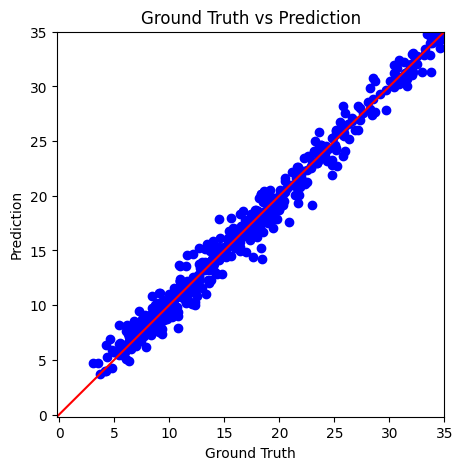

In [ ]:
del model
model = My_Model(train_loader.dataset.features_num).to(device) # use train_loader for more all around features
model.load_state_dict(torch.load(config['save_path'], map_location="cpu"))
pred_plot(valid_loader, model, device) # use valid_loader for generalized prediction. if we use train_loader, it could lead to overfitted pred.

# Output

In [ ]:
def test_pred(test_loader, model, device):
    model.eval()
    y_hats = []
    for x in test_loader:
        x = x.to(device)
        with torch.no_grad():
            y_hat = model(x)
            y_hats.append(y_hat.detach().cpu())
    y_hats = torch.cat(y_hats, dim=0).numpy()
    return y_hats

def save_pred(y_hats, file):
    ''' Save predictions to specified file '''
    with open(file, 'w') as fp:
        writer = csv.writer(fp)
        writer.writerow(['id', 'tested_positive.2'])
        for i, y_hat in enumerate(y_hats):
            writer.writerow([i, y_hat])

y_hats = test_pred(test_loader, model, device)
os.makedirs("Output", exist_ok=True)
save_pred(y_hats, 'Output/pred.csv')



# Reference
This notebook uses code written by Heng-Jui Chang @ NTUEE (https://github.com/ga642381/ML2021-Spring/blob/main/HW01/HW01.ipynb)